# Merge des dataframes recipe & stat et nettoyage du dataframe final

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
#from textblob import TextBlob
#from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler

In [4]:
fichierrecipe_cleaned_part1 = "Pretraitement/recipe_cleaned_part_1.csv"
fichierrecipe_cleaned_part2 = "Pretraitement/recipe_cleaned_part_2.csv"
fichierrecipe_cleaned_part3 = "Pretraitement/recipe_cleaned_part_3.csv"        
fichierrecipe_cleaned_part4 = "Pretraitement/recipe_cleaned_part_4.csv"
fichierrecipe_cleaned_part5 = "Pretraitement/recipe_cleaned_part_5.csv"

def append_csv(*files):
    df_list = []
    for file in files:
        df = pd.read_csv(file)
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)
    
recipe = append_csv(fichierrecipe_cleaned_part1, fichierrecipe_cleaned_part2, fichierrecipe_cleaned_part3, fichierrecipe_cleaned_part4, fichierrecipe_cleaned_part5)

recipe.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%),year,month,day,day_of_week
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,13.0,0.0,2.0,0.0,4.0,2005,9,16,Friday
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,18.0,0.0,17.0,22.0,35.0,1.0,2002,6,17,Monday
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,22.0,32.0,48.0,39.0,27.0,5.0,2005,2,25,Friday


In [5]:
stat_user = pd.read_csv("Pretraitement/recipe_mark.csv")
stat_user.head(3)

,recipe_id,nb_user,note_moyenne,note_mediane,note_q1,note_q2,note_q3,note_q4,note_max,note_min,nb_note_lt_5,nb_note_eq_5
0,38,4,4.250000,4.0,4.0,4.0,4.25,5.0,5,4,3,1
1,39,1,3.000000,3.0,3.0,3.0,3.00,3.0,3,3,1,0
2,40,9,4.333333,5.0,4.0,5.0,5.00,5.0,5,1,3,6


In [6]:
merged_df = pd.merge(recipe, stat_user, left_on="id", right_on="recipe_id", how="left")
merged_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,note_moyenne,note_mediane,note_q1,note_q2,note_q3,note_q4,note_max,note_min,nb_note_lt_5,nb_note_eq_5
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,5.0,5.0,5.00,5.0,5.00,5.0,5,5,0,3
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,3.5,4.5,3.00,4.5,5.00,5.0,5,0,2,2
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,4.0,4.0,4.00,4.0,4.00,4.0,4,4,1,0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,4.5,4.5,4.25,4.5,4.75,5.0,5,4,1,1
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,...,5.0,5.0,5.00,5.0,5.00,5.0,5,5,0,1


Vérifions si le merge n'a pas créé des NaN :

In [7]:
print('Le nombre de missing values par colonnes :')
print(merged_df.isna().sum())

Le nombre de missing values par colonnes :
name                 0
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description          0
ingredients          0
n_ingredients        0
calories             0
total fat (%)        0
sugar (%)            0
sodium (%)           0
protein (%)          0
saturated fat (%)    0
carbohydrates (%)    0
year                 0
month                0
day                  0
day_of_week          0
recipe_id            0
nb_user              0
note_moyenne         0
note_mediane         0
note_q1              0
note_q2              0
note_q3              0
note_q4              0
note_max             0
note_min             0
nb_note_lt_5         0
nb_note_eq_5         0
dtype: int64


In [8]:
# Vérifions si on a des doublons

num_duplicates = merged_df.duplicated().sum()
print(f"Nombre de doublons : {num_duplicates}")

Nombre de doublons : 0


In [9]:
# Dropons la colonne id en double et la colonne nutrition déjà traitée
merged_df.drop(['recipe_id','nutrition','steps'], axis=1, inplace=True)

In [10]:
# Vérifions les types des colonnes

merged_df.dtypes

name                  object
id                     int64
minutes                int64
contributor_id         int64
submitted             object
tags                  object
n_steps                int64
description           object
ingredients           object
n_ingredients          int64
calories             float64
total fat (%)        float64
sugar (%)            float64
sodium (%)           float64
protein (%)          float64
saturated fat (%)    float64
carbohydrates (%)    float64
year                   int64
month                  int64
day                    int64
day_of_week           object
nb_user                int64
note_moyenne         float64
note_mediane         float64
note_q1              float64
note_q2              float64
note_q3              float64
note_q4              float64
note_max               int64
note_min               int64
nb_note_lt_5           int64
nb_note_eq_5           int64
dtype: object

In [11]:
# Renommons les colonnes pour plus de practicité :
merged_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'n_steps', 'description', 'ingredients', 'n_ingredients', 'calories',
       'total fat (%)', 'sugar (%)', 'sodium (%)', 'protein (%)',
       'saturated fat (%)', 'carbohydrates (%)', 'year', 'month', 'day',
       'day_of_week', 'nb_user', 'note_moyenne', 'note_mediane', 'note_q1',
       'note_q2', 'note_q3', 'note_q4', 'note_max', 'note_min', 'nb_note_lt_5',
       'nb_note_eq_5'],
      dtype='object')

In [12]:
merged_df.columns = ['name', 'recipe_id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'n_steps', 'description', 'ingredients',
       'n_ingredients', 'calories', 'total_fat', 'sugar', 'sodium',
       'protein', 'saturated_fat', 'carbohydrates', 'year',
       'month', 'day', 'day_of_week', 'nb_user', 'note_moyenne',
       'note_mediane', 'note_q1', 'note_q2', 'note_q3', 'note_q4', 'note_max',
       'note_min', 'nb_note_lt_5', 'nb_note_eq_5']

In [13]:
# Convertissons les colonnes suivantes en object : recipe_id, contributor_id, year, month, day
# Passer les colonnes month et day en categorical :
merged_df['recipe_id'] = merged_df['recipe_id'].astype('object')
merged_df['contributor_id'] = merged_df['recipe_id'].astype('object')
merged_df['year'] = merged_df['year'].astype('object')
merged_df['month'] = merged_df['month'].astype('object')
merged_df['day'] = merged_df['day'].astype('object')

# Verifier le changement
merged_df.dtypes

name               object
recipe_id          object
minutes             int64
contributor_id     object
submitted          object
tags               object
n_steps             int64
description        object
ingredients        object
n_ingredients       int64
calories          float64
total_fat         float64
sugar             float64
sodium            float64
protein           float64
saturated_fat     float64
carbohydrates     float64
year               object
month              object
day                object
day_of_week        object
nb_user             int64
note_moyenne      float64
note_mediane      float64
note_q1           float64
note_q2           float64
note_q3           float64
note_q4           float64
note_max            int64
note_min            int64
nb_note_lt_5        int64
nb_note_eq_5        int64
dtype: object

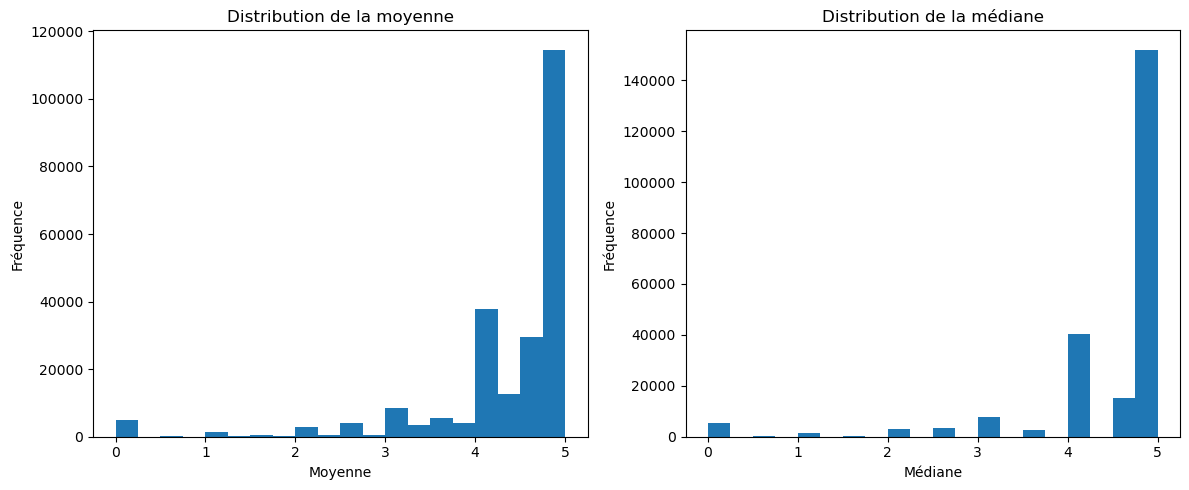

In [14]:
# Visualisons les distributions des moyennes et médianes avec des histogrammes

plt.figure(figsize=(12, 5))

# Distribution de la moyenne
plt.subplot(1, 2, 1)
plt.hist(merged_df['note_moyenne'], bins=20)
plt.title('Distribution de la moyenne')
plt.xlabel('Moyenne')
plt.ylabel('Fréquence')

# Distribution de la médiane
plt.subplot(1, 2, 2)
plt.hist(merged_df['note_mediane'], bins=20)
plt.title('Distribution de la médiane')
plt.xlabel('Médiane')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Qu'est-ce qui caractérise une mauvaise recette ?

La première partie de l'analyse portera sur l'analyse des contributions qui ont eu une moyenne de moins de 4/5 ou égale à 4 :
Quels sont les critères d'une mauvaise recette/contribution ? Quelles sont les caractéristiques des recettes les moins populaires ? Qu'est-ce qui fait qu'une recette est mal notée? 

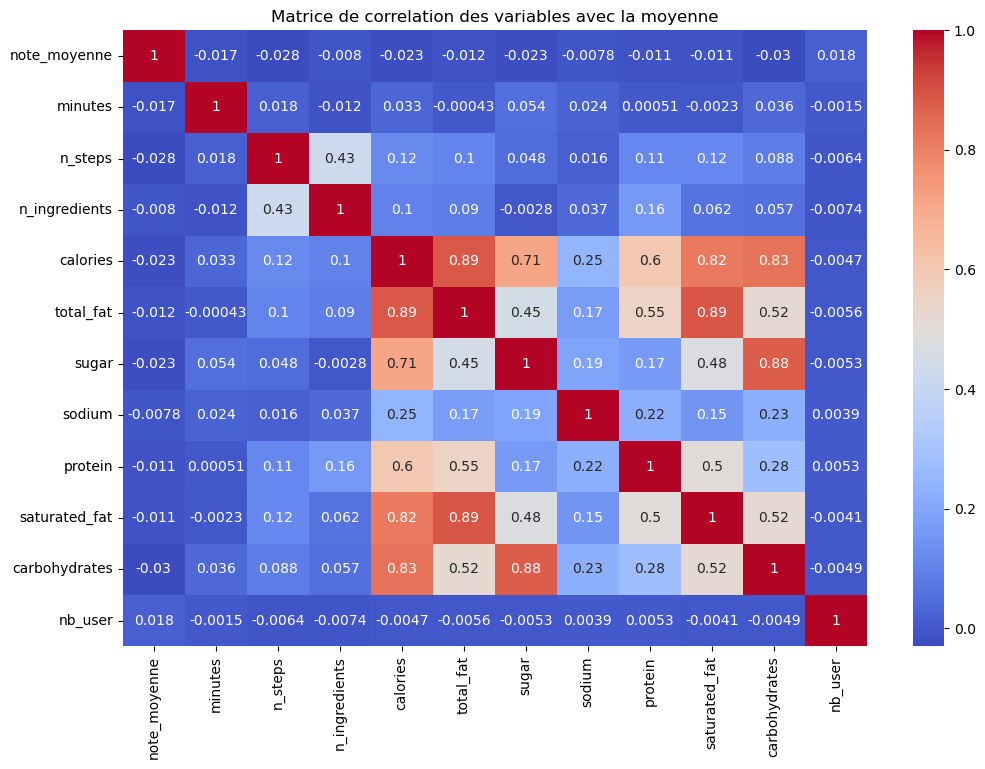

In [15]:
# Commençons par regarder les corrélations grâce à une matrice de corrélation
plt.figure(figsize=(12, 8))
correlation = merged_df[['note_moyenne', 'minutes', 'n_steps', 'n_ingredients', 'calories', 'total_fat', 
                         'sugar', 'sodium','protein', 'saturated_fat', 'carbohydrates', 'nb_user']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matrice de correlation des variables avec la moyenne')
plt.show()

Pas de corrélation entre les notes et les variables sélectionnées dans la correlation matrix. Les outliers peuvent grandement affecter les corrélations. Nous avons vu qu'ils étaient nombreux dans la première partie de l'analyse du dataset recipe. Nous allons les supprimer pour la suite de l'analyse.

In [16]:
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns

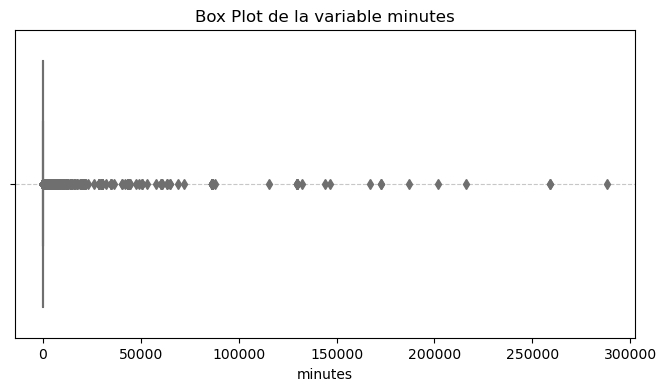

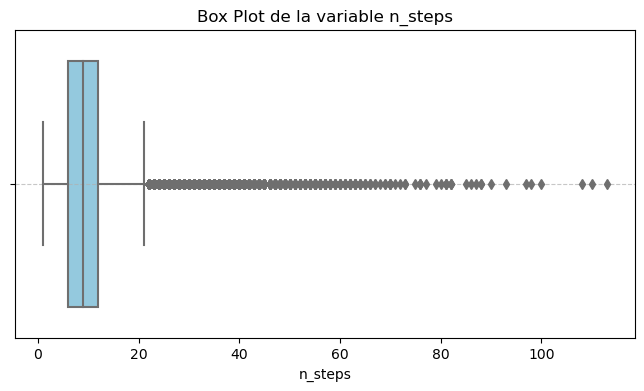

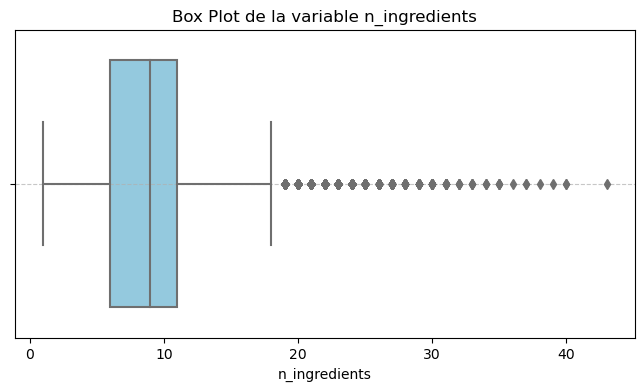

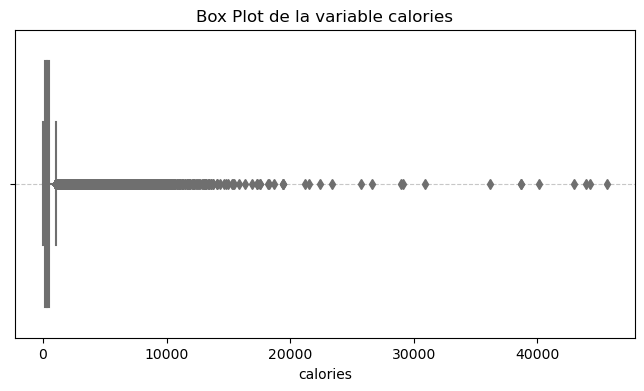

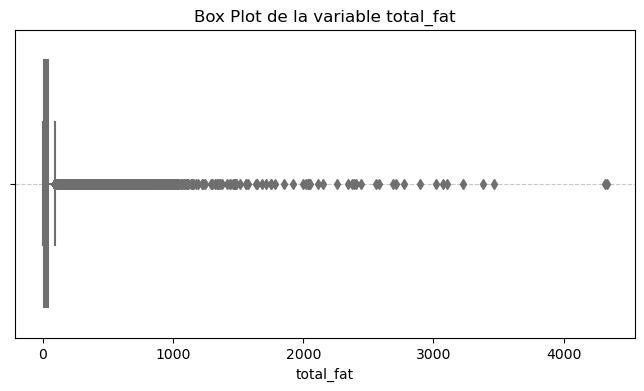

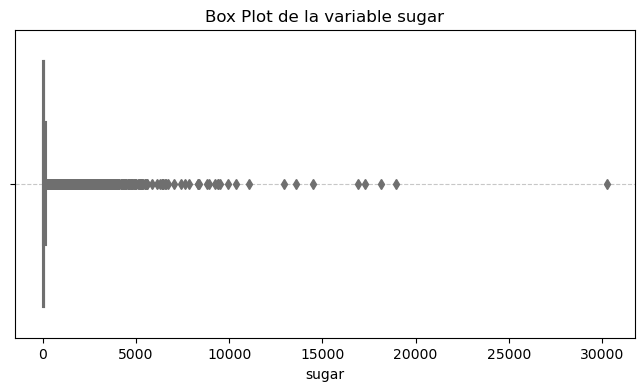

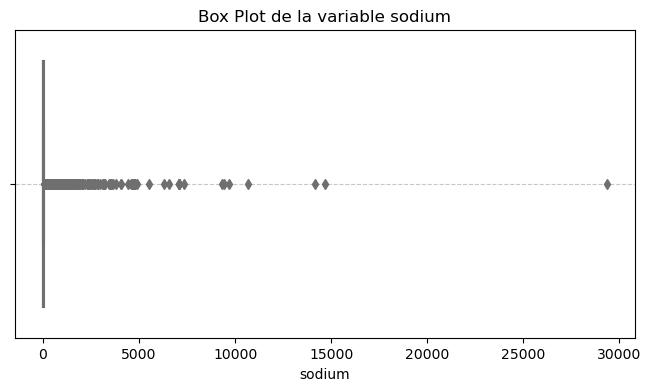

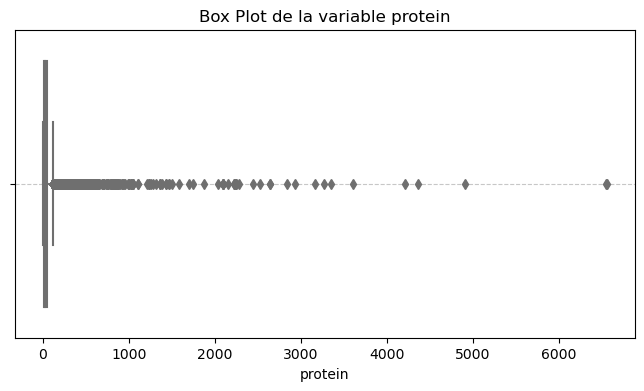

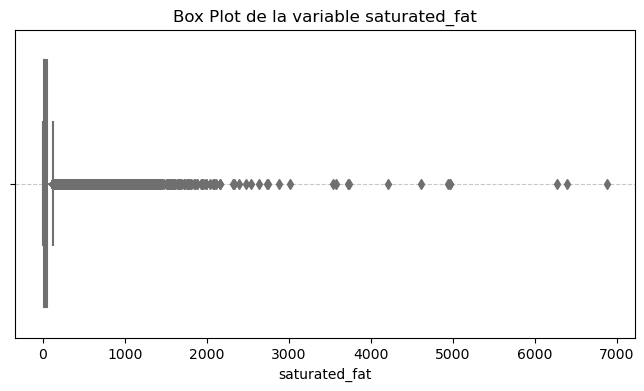

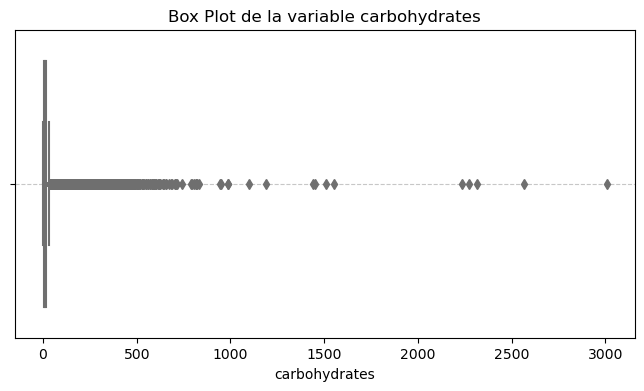

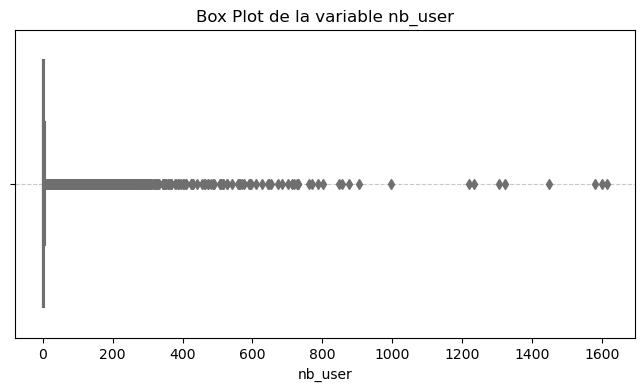

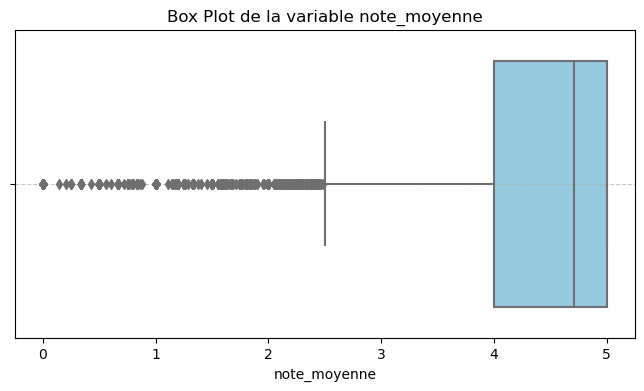

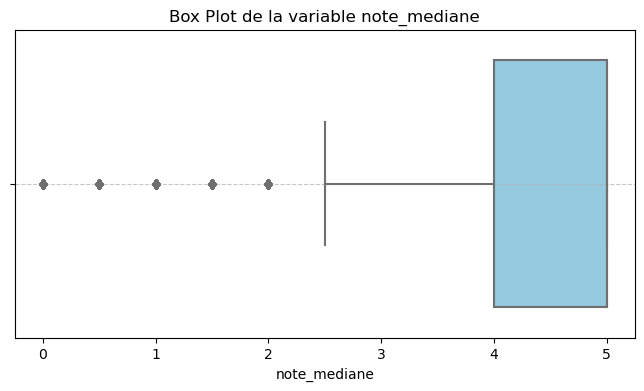

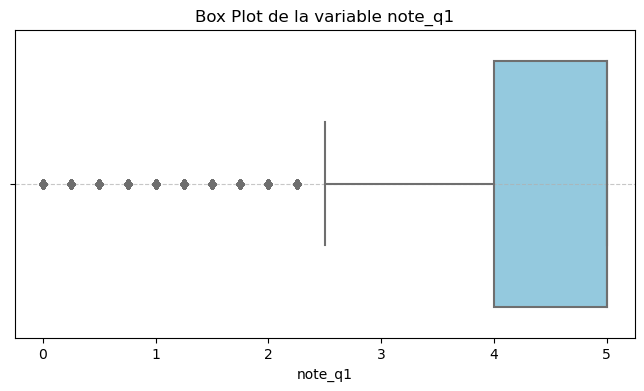

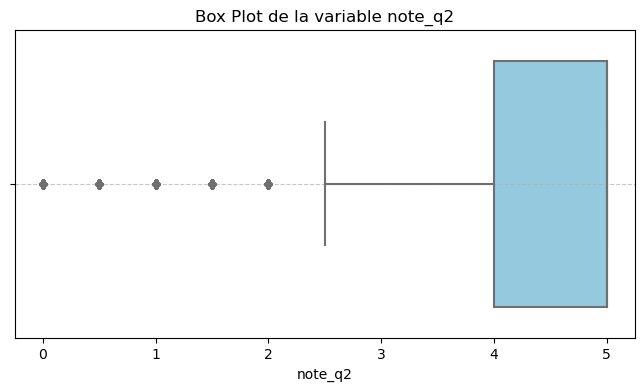

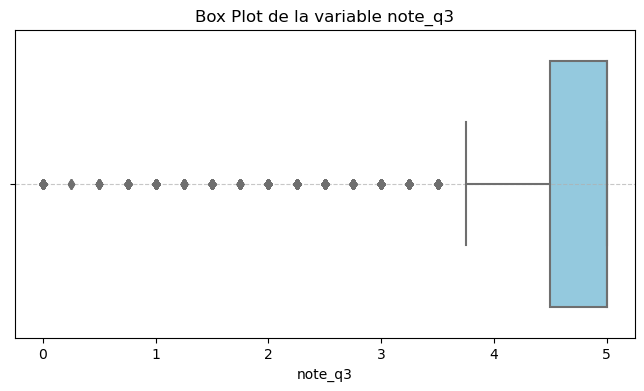

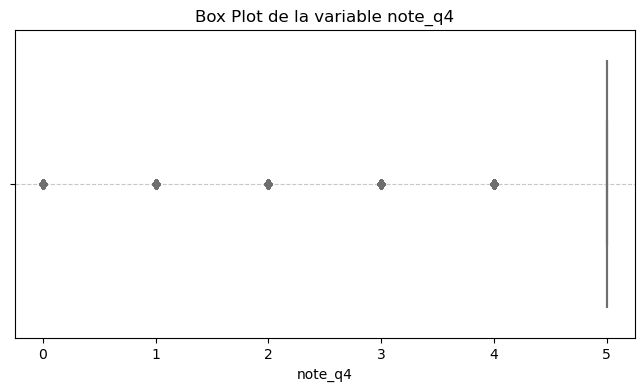

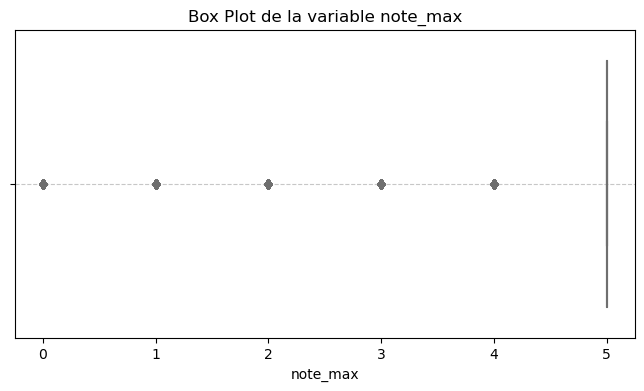

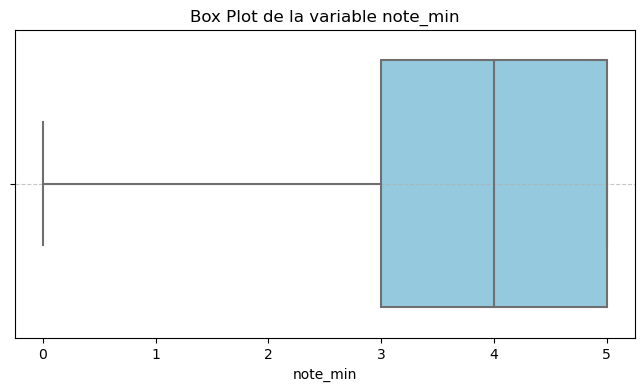

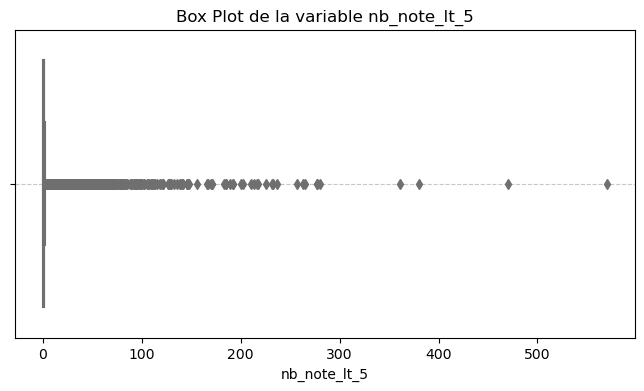

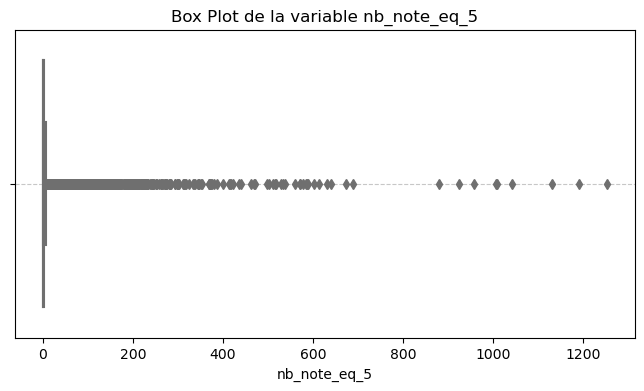

In [17]:
for column in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=merged_df[column], color='skyblue')
    plt.title(f'Box Plot de la variable {column}')
    plt.xlabel(column)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [18]:
# Calculer les pourcentages d'outliers pour chaque colonne :
outlier_info = {}

for column in numerical_cols:  
    Q1 = merged_df[column].quantile(0.15)  
    Q3 = merged_df[column].quantile(0.85)  
    IQR = Q3 - Q1  # Étendue interquartile
    
    # Nous nous concentrerons sur la borne supérieure qui comprend tous les outliers
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifier les outliers
    outliers = merged_df[(merged_df[column] > upper_bound)]
    
    # Calculer le pourcentage d'outliers
    outlier_percentage = (len(outliers) / len(merged_df)) * 100
    
    # Ajouter les informations dans un dictionnaire
    outlier_info[column] = {
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers),
        'Outlier Percentage (%)': outlier_percentage
    }

# Convertir le dictionnaire en DataFrame pour une meilleure lisibilité
import pandas as pd
outlier_summary = pd.DataFrame(outlier_info).T

# Afficher les résultats
print(outlier_summary)

               Upper Bound  Outlier Count  Outlier Percentage (%)
minutes             202.50        14741.0                6.364001
n_steps              31.50         1866.0                0.805592
n_ingredients        25.00          235.0                0.101454
calories           1531.35         8820.0                3.807780
total_fat           136.50         8512.0                3.674810
sugar               280.00        11012.0                4.754113
sodium              117.00         7081.0                3.057017
protein             164.00         3429.0                1.480372
saturated_fat       185.50         7686.0                3.318209
carbohydrates        52.00         9347.0                4.035298
nb_user              16.00        10056.0                4.341388
note_moyenne          6.80            0.0                0.000000
note_mediane          6.50            0.0                0.000000
note_q1               7.25            0.0                0.000000
note_q2   

In [19]:
# Définir les colonnes sur lesquelles nous voulons appliquer la suppression des valeurs aberrantes
col_to_clean = ['minutes', 'n_steps', 'n_ingredients', 'calories', 'total_fat', 'sugar',
                'sodium', 'protein', 'saturated_fat', 'carbohydrates']

# Créer une copie du DataFrame initial pour travailler dessus
cleaned_df = merged_df.copy()

# Appliquer le filtrage des outliers
for col in col_to_clean:
    Q1 = merged_df[col].quantile(0.15)
    Q3 = merged_df[col].quantile(0.85)
    IQR = Q3 - Q1  # Étendue interquartile
    
    # Calculer la borne supérieure
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrer les lignes cumulativement
    cleaned_df = cleaned_df[cleaned_df[col] <= upper_bound]

# Vérifier la taille avant et après la suppression des outliers
print(f"Taille initiale du DataFrame : {merged_df.shape}")
print(f"Taille après suppression des outliers : {cleaned_df.shape}")

Taille initiale du DataFrame : (231631, 32)
Taille après suppression des outliers : (195230, 32)


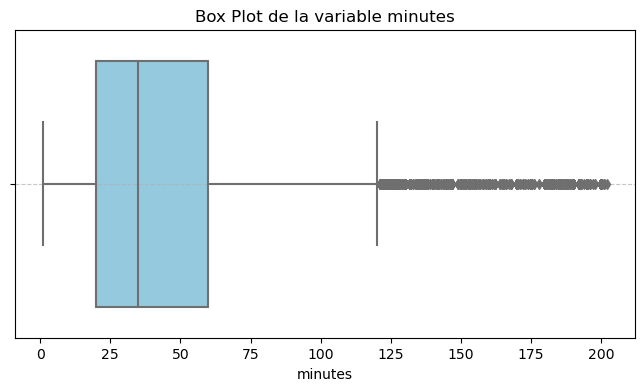

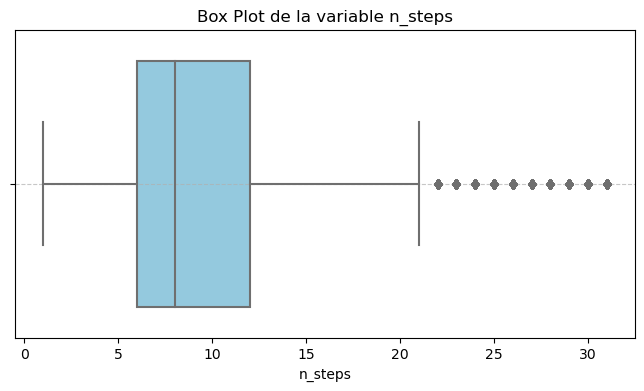

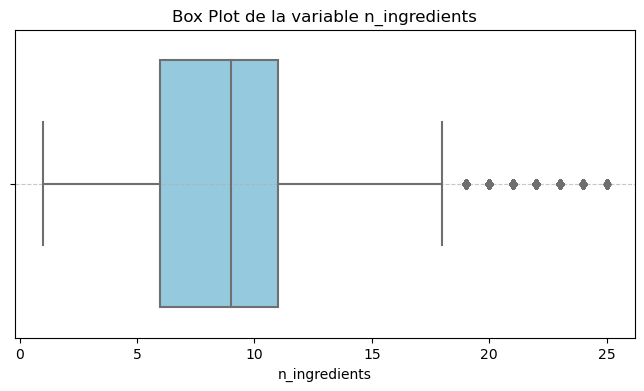

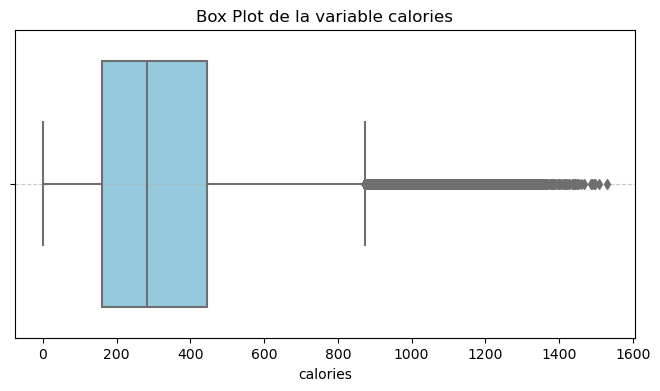

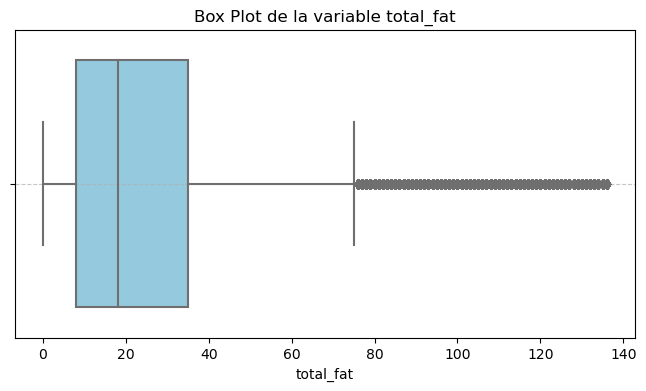

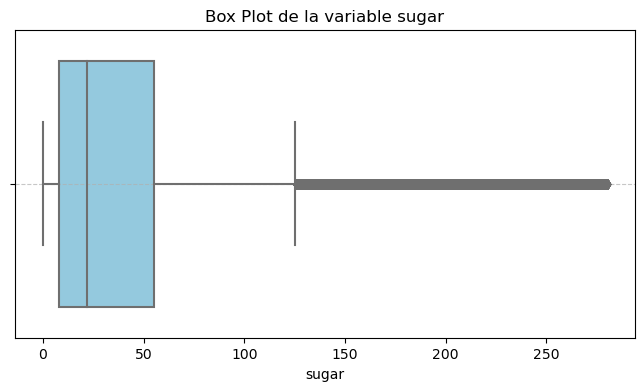

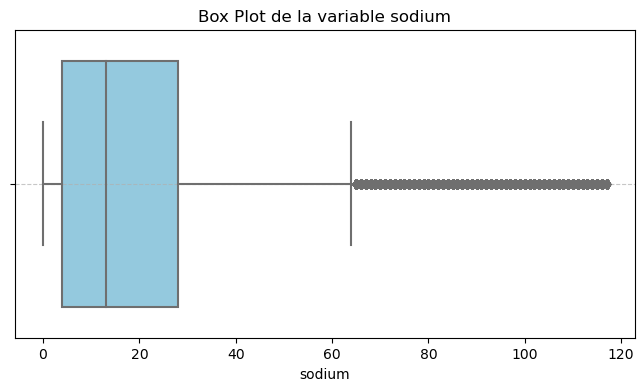

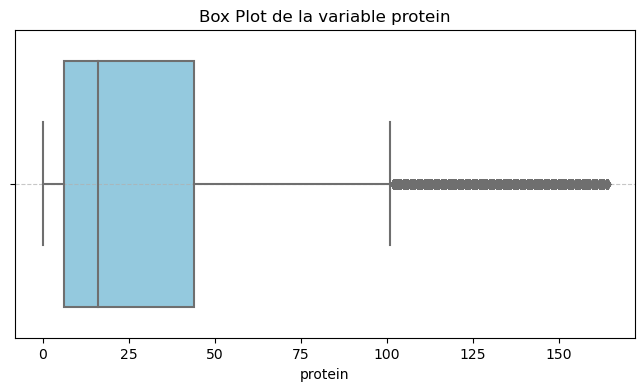

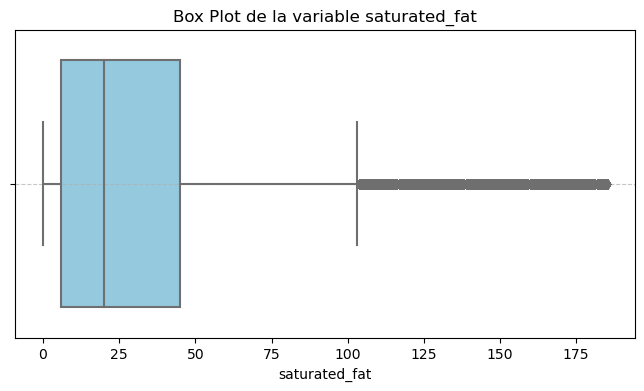

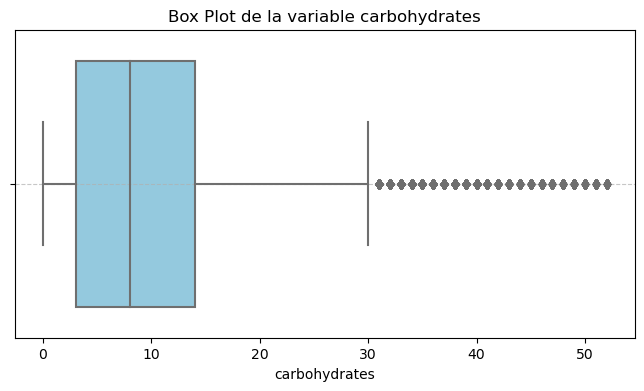

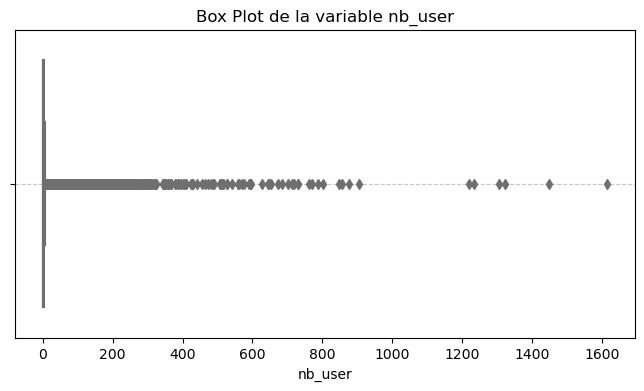

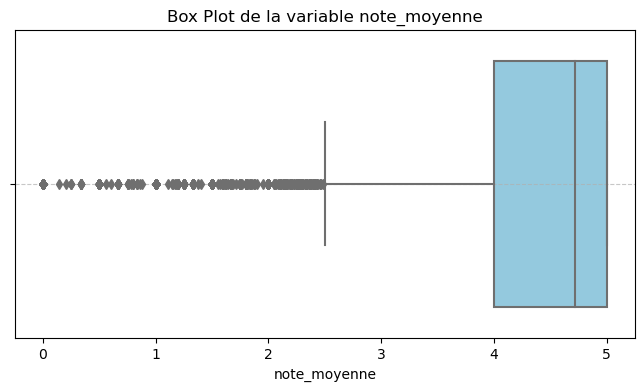

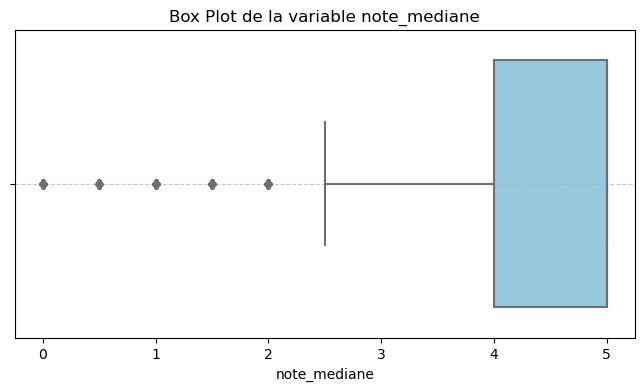

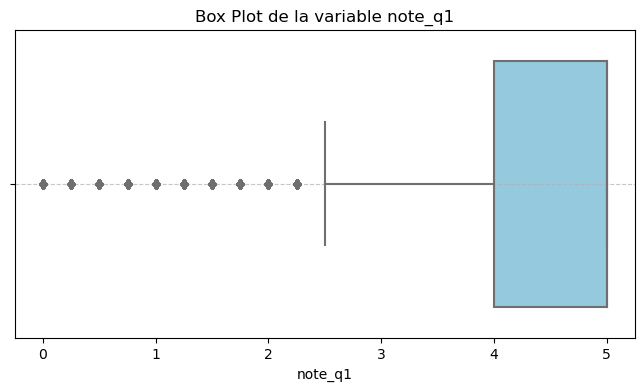

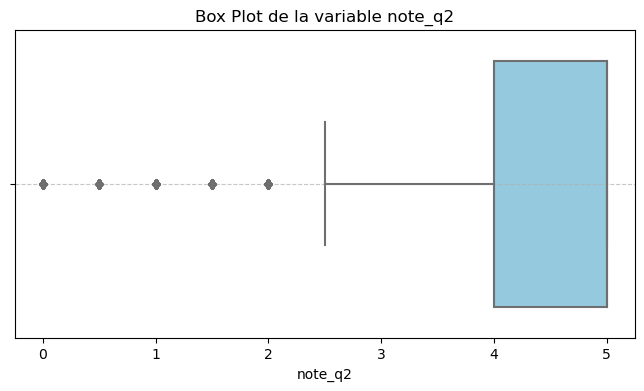

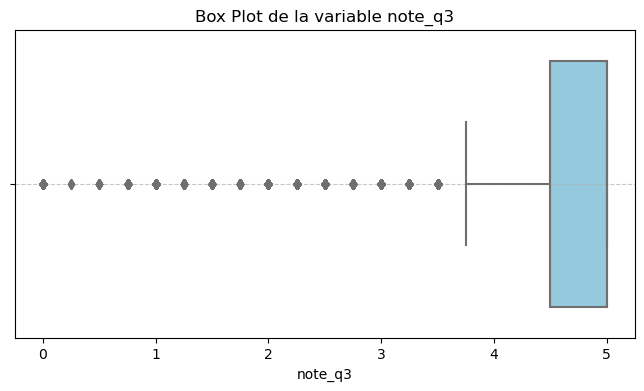

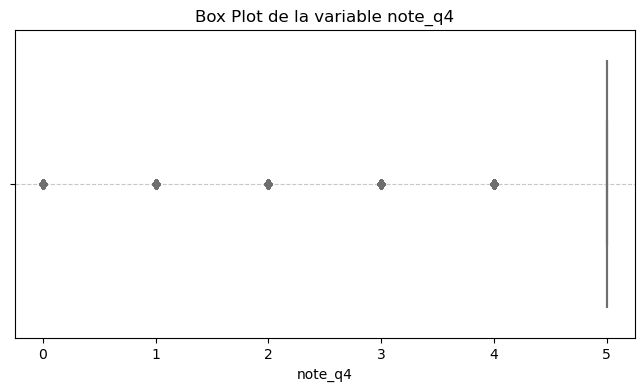

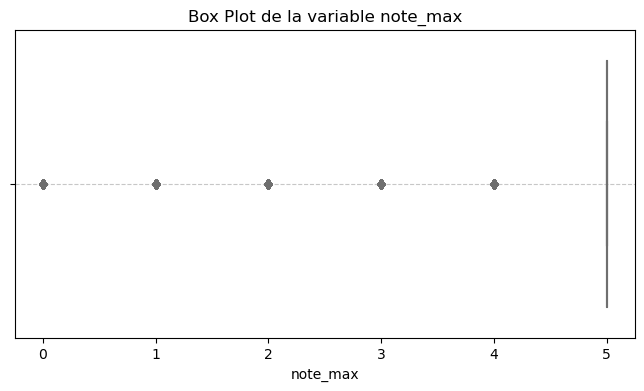

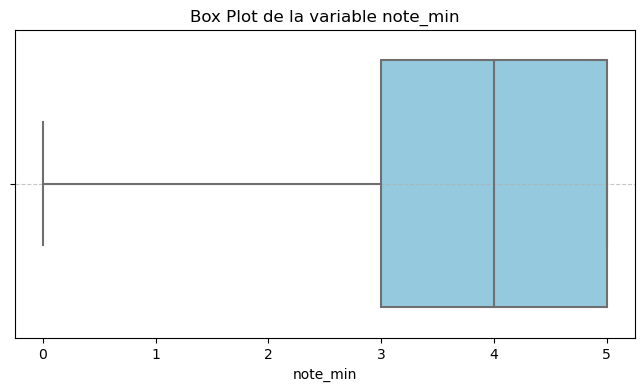

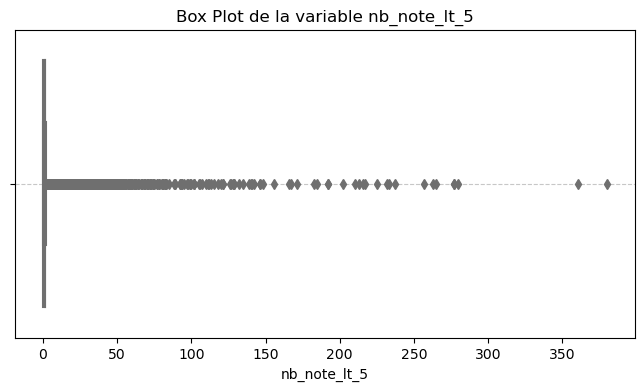

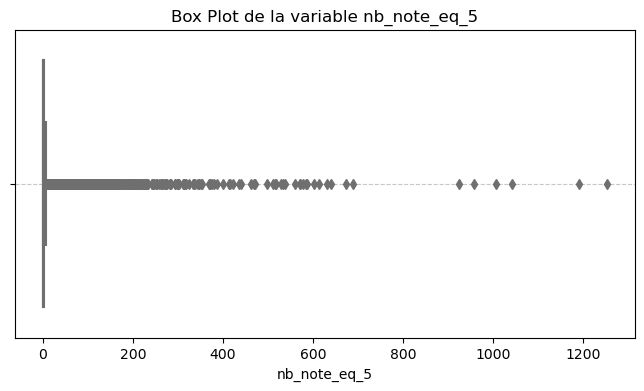

In [20]:
# Regardons à nouveau les boxplots :

numerical_cols_clean= cleaned_df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_cols_clean:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cleaned_df[column], color='skyblue')
    plt.title(f'Box Plot de la variable {column}')
    plt.xlabel(column)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

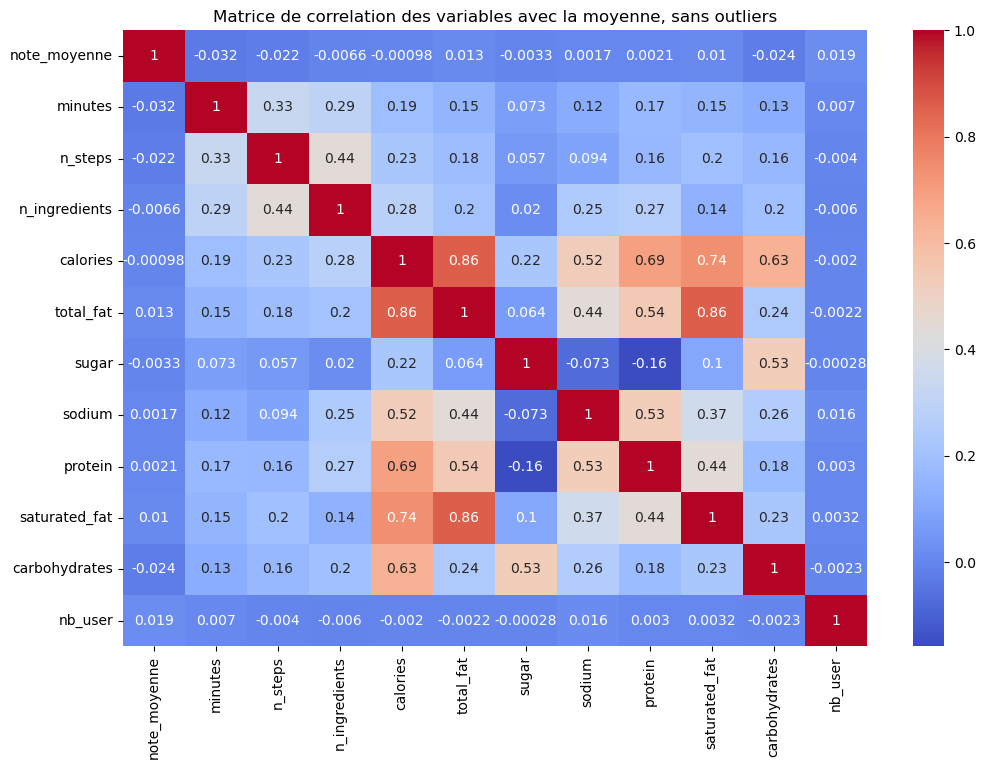

In [21]:
# Et les corrélations :

plt.figure(figsize=(12, 8))
correlation_noout = cleaned_df[['note_moyenne', 'minutes', 'n_steps', 'n_ingredients', 'calories', 'total_fat', 
                         'sugar', 'sodium','protein', 'saturated_fat', 'carbohydrates', 'nb_user']].corr()
sns.heatmap(correlation_noout, annot=True, cmap='coolwarm')
plt.title('Matrice de correlation des variables avec la moyenne, sans outliers')
plt.show()

Toujours pas de corrélations avec notre variable note_moyenne. Il se peut que le passage à la moyenne altère les corrélations. Continuous l'analyse en comparant des metrics pour les good et bad ratings, nous reviendrons à ce problème de moyenne dans un deuxième temps.


Regardons à quelle note correspond le 1e quartile. Nous nous concentrerons sur les 25% moins bonnes recettes pour notre analyse.

In [22]:
# Calculer le 3e quartile pour la médiane et la moyenne
mean_third_quartile = cleaned_df['note_moyenne'].quantile(0.25)
median_third_quartile = cleaned_df['note_mediane'].quantile(0.25)

# Display the results
print("3e Quartile pour la moyenne:", mean_third_quartile)
print("3e Quartile pour la médiane:", median_third_quartile)

3e Quartile pour la moyenne: 4.0
3e Quartile pour la médiane: 4.0


In [23]:
print('Nombre de recettes avec une moyenne inférieure à 4 :')
print(cleaned_df[cleaned_df['note_moyenne'] <= 4.0].shape[0])
print('Nombre de recettes avec une médiane inférieure à 4 :')
print(cleaned_df[cleaned_df['note_mediane'] <= 4.0].shape[0])

Nombre de recettes avec une moyenne inférieure à 4 :
58241
Nombre de recettes avec une médiane inférieure à 4 :
54058


Nous nous concentrerons sur la moyenne qui nous permet d'augmenter l'échantillon de bad ratings. Compte tenu de la distribution de la moyenne, on peut considérer les 4 (et moins) comme des mauvaises notes.

Afin de comparer les recettes mal notées des bien notées, nous devons filtrer le dataframe entre bonnes et mauvaises notes. 

In [24]:
# Filtrer les recettes avec une note inférieure ou égale à 4 :
bad_ratings = cleaned_df[cleaned_df['note_moyenne'] <= 4.0]
good_ratings = cleaned_df[cleaned_df['note_moyenne'] > 4.0]

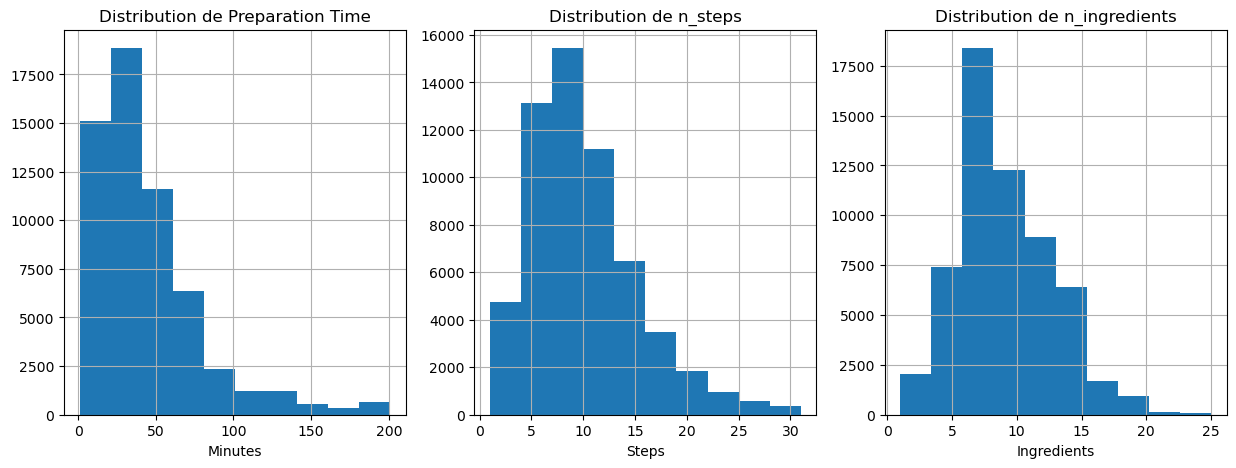

In [25]:
# Distribution des variables preparation time, number of steps, and ingredients pour les recettes mal notées
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

bad_ratings['minutes'].hist(ax=axes[0])
axes[0].set_title('Distribution de Preparation Time')
axes[0].set_xlabel('Minutes')

bad_ratings['n_steps'].hist(ax=axes[1])
axes[1].set_title('Distribution de n_steps')
axes[1].set_xlabel('Steps')

bad_ratings['n_ingredients'].hist(ax=axes[2])
axes[2].set_title('Distribution de n_ingredients')
axes[2].set_xlabel('Ingredients')
plt.show()

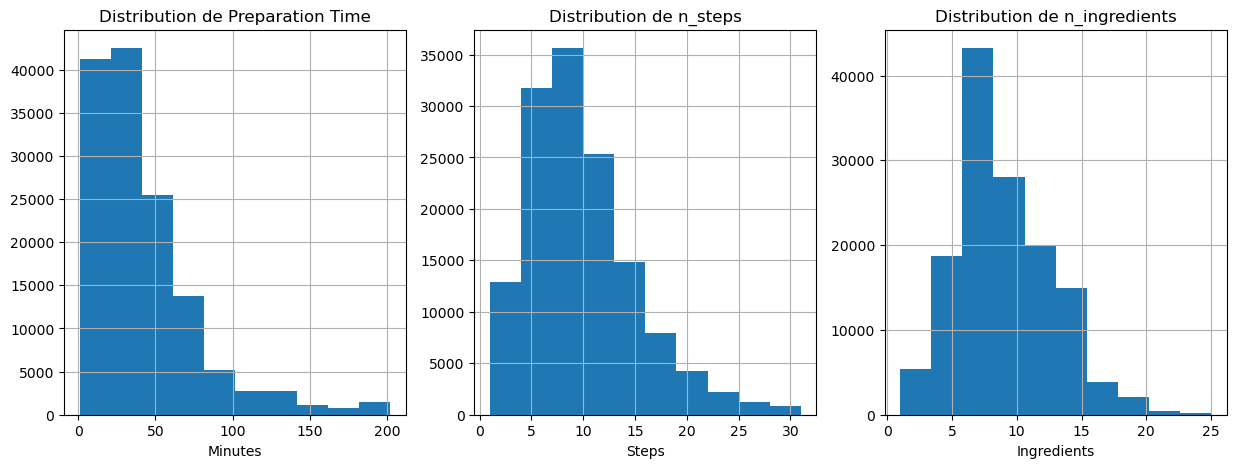

In [26]:
# Comparons avec toutes les recettes de la base de données : est-ce que les mauvaises notes ont tiré vers le bas certaines de ces variables ?

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

good_ratings['minutes'].hist(ax=axes[0])
axes[0].set_title('Distribution de Preparation Time')
axes[0].set_xlabel('Minutes')

good_ratings['n_steps'].hist(ax=axes[1])
axes[1].set_title('Distribution de n_steps')
axes[1].set_xlabel('Steps')

good_ratings['n_ingredients'].hist(ax=axes[2])
axes[2].set_title('Distribution de n_ingredients')
axes[2].set_xlabel('Ingredients')
plt.show()

Pas de grosses variations à observer...

Regardons maintenant si la saisonnalité / la période où la recette est postée a un impact :

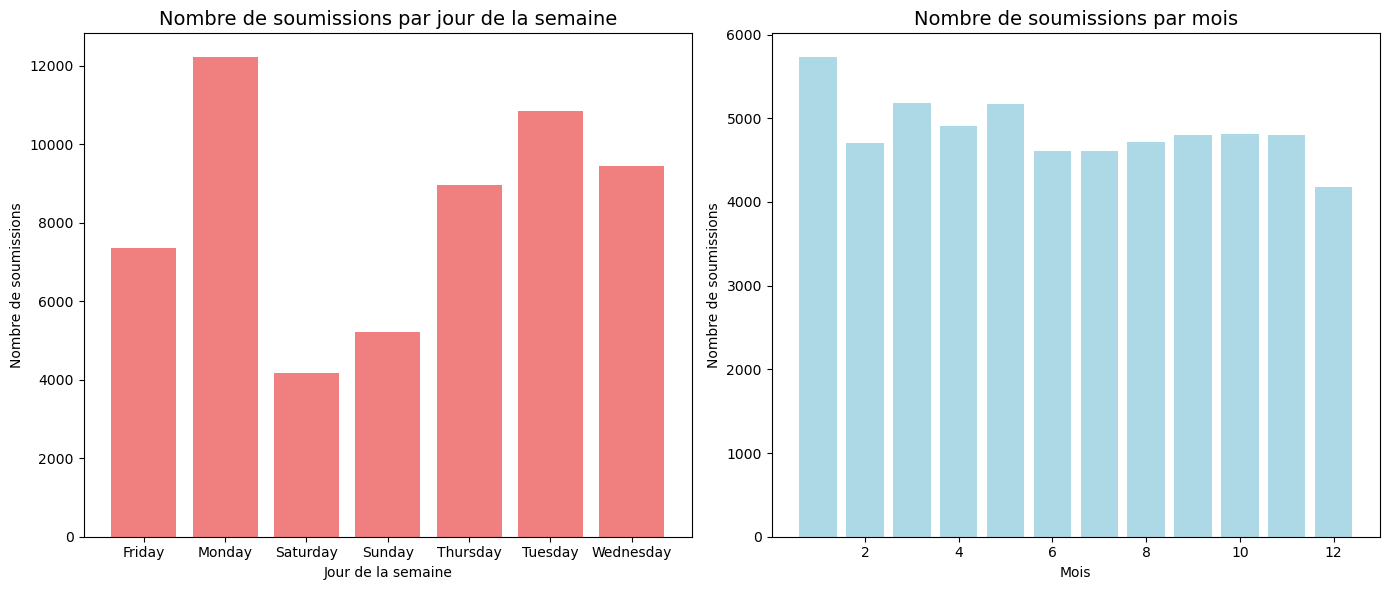

In [27]:
# Grouper par jour de la semaine pour compter les soumissions
day_of_week_bad = bad_ratings['day_of_week'].value_counts().sort_index()

# Grouper par mois pour compter les soumissions
month_bad = bad_ratings['month'].value_counts().sort_index()

# Créer les barplots
plt.figure(figsize=(14, 6))

# Barplot pour le nombre de soumissions selon le jour de la semaine
plt.subplot(1, 2, 1)
plt.bar(day_of_week_bad.index, day_of_week_bad.values, color='lightcoral')
plt.title('Nombre de soumissions par jour de la semaine', fontsize=14)
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de soumissions')

# Barplot pour le nombre de soumissions selon le mois de l'année
plt.subplot(1, 2, 2)
plt.bar(month_bad.index, month_bad.values, color='lightblue')
plt.title('Nombre de soumissions par mois', fontsize=14)
plt.xlabel('Mois')
plt.ylabel('Nombre de soumissions')

# Ajuster l'affichage des graphiques
plt.tight_layout()
plt.show()

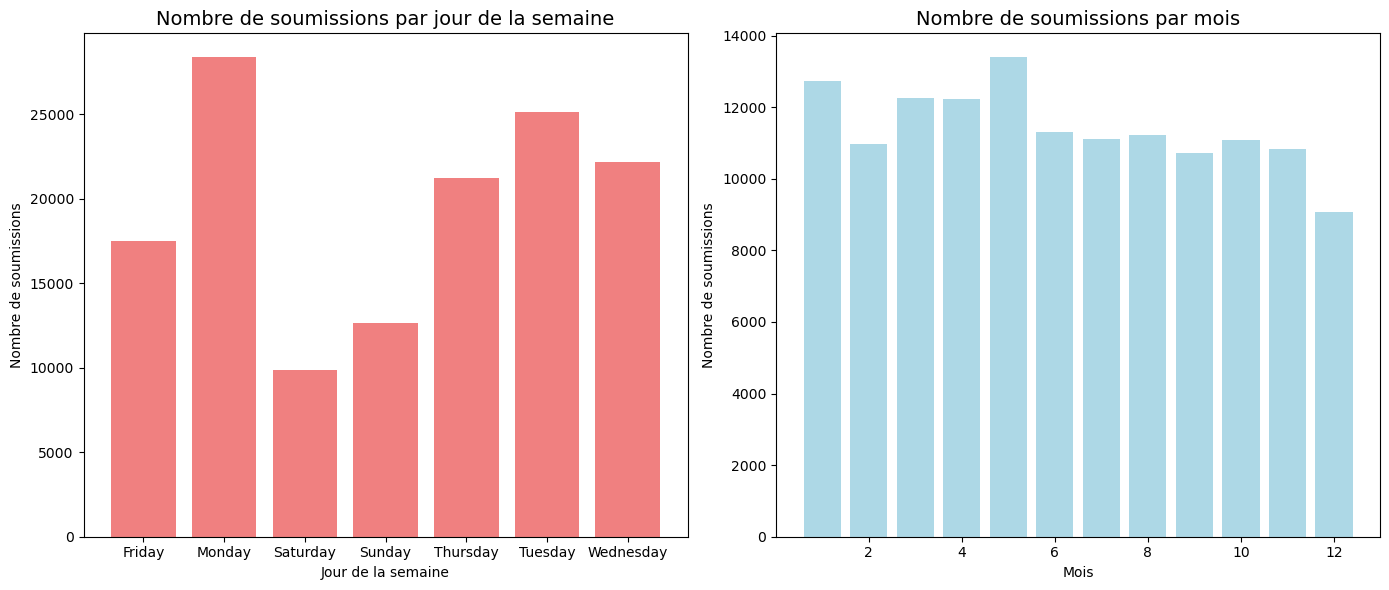

In [28]:
# En comparant avec le dataframe complet :
day_of_week_good = good_ratings['day_of_week'].value_counts().sort_index()

# Grouper par mois pour compter les soumissions
month_good = good_ratings['month'].value_counts().sort_index()

# Créer les barplots
plt.figure(figsize=(14, 6))

# Barplot pour le nombre de soumissions selon le jour de la semaine
plt.subplot(1, 2, 1)
plt.bar(day_of_week_good.index, day_of_week_good.values, color='lightcoral')
plt.title('Nombre de soumissions par jour de la semaine', fontsize=14)
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de soumissions')

# Barplot pour le nombre de soumissions selon le mois de l'année
plt.subplot(1, 2, 2)
plt.bar(month_good.index, month_good.values, color='lightblue')
plt.title('Nombre de soumissions par mois', fontsize=14)
plt.xlabel('Mois')
plt.ylabel('Nombre de soumissions')

# Ajuster l'affichage des graphiques
plt.tight_layout()
plt.show()

Nous n'observons pas d'impact de la saisonnalité du post entre bad et good ratings.

# Analyser l'impact du temps de préparation and la complexité sur les notes

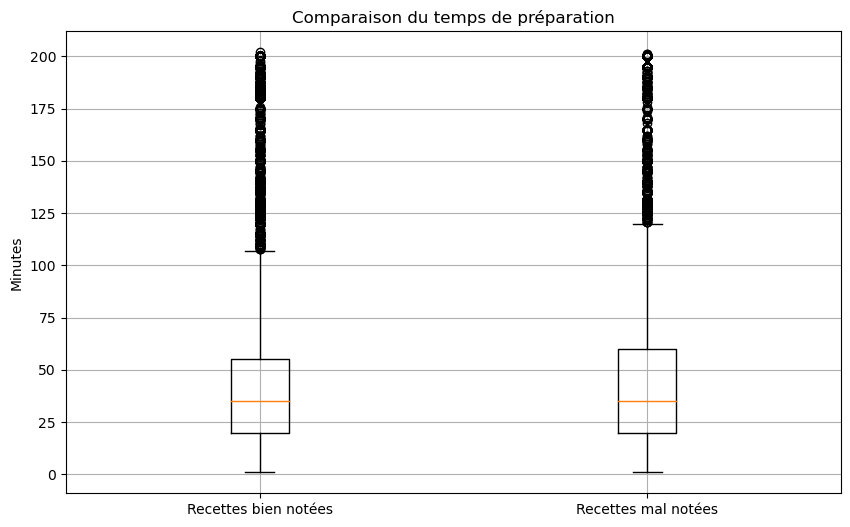

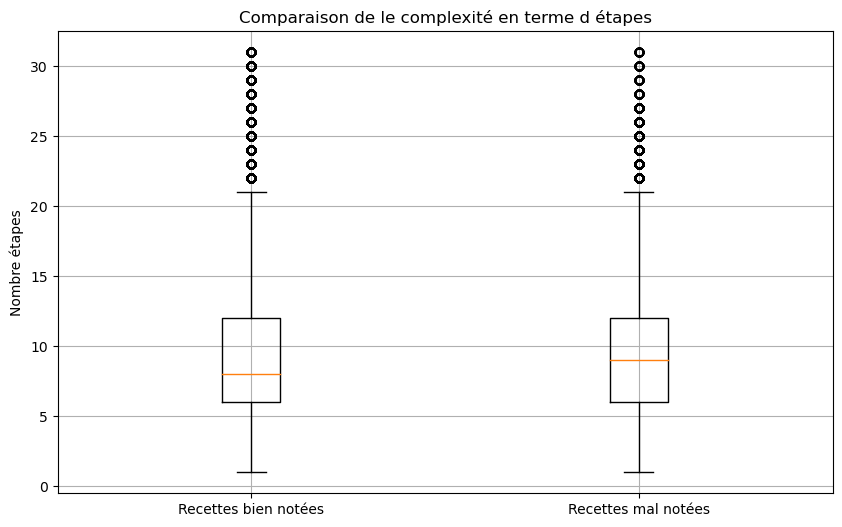

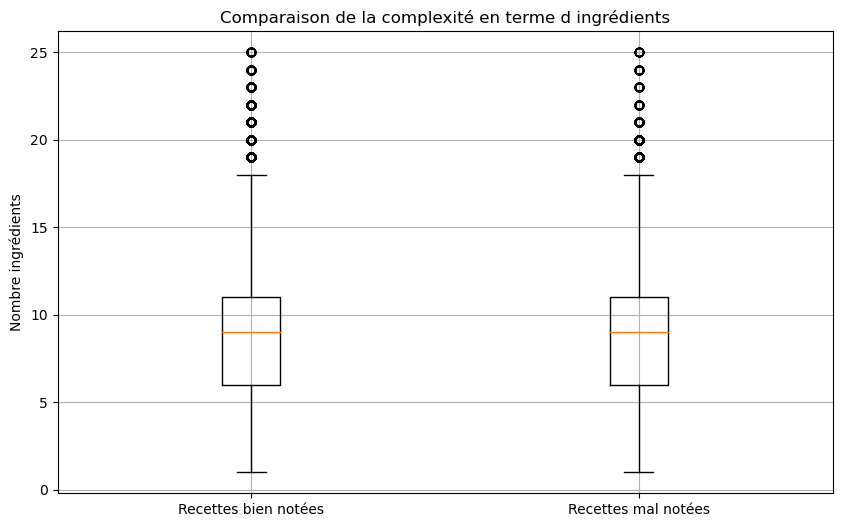

In [29]:
# 1. Box Plot pour la variable Minutes
plt.figure(figsize=(10, 6))

# Data à plot
data_minutes = [good_ratings['minutes'], bad_ratings['minutes']]

# Créer les boxplots
plt.boxplot(data_minutes, labels=['Recettes bien notées', 'Recettes mal notées'])
plt.title('Comparaison du temps de préparation')
plt.ylabel('Minutes')
plt.grid(True)
plt.show()

# 2. Box Plot pour Complexity (Number of Steps)
plt.figure(figsize=(10, 6))

# Data to plot
data_steps = [good_ratings['n_steps'], bad_ratings['n_steps']]

# Create box plot
plt.boxplot(data_steps, labels=['Recettes bien notées', 'Recettes mal notées'])
plt.title('Comparaison de le complexité en terme d étapes')
plt.ylabel('Nombre étapes')
plt.grid(True)
plt.show()

# 3. Box Plot for Complexity (Number of Ingredients)
plt.figure(figsize=(10, 6))

# Data to plot
data_steps = [good_ratings['n_ingredients'], bad_ratings['n_ingredients']]

# Create box plot
plt.boxplot(data_steps, labels=['Recettes bien notées', 'Recettes mal notées'])
plt.title('Comparaison de la complexité en terme d ingrédients')
plt.ylabel('Nombre ingrédients')
plt.grid(True)
plt.show()

Les recettes mal notées tendent à avoir des temps de préparation plus longs et un nombre d'étapes à suivre plus élevé. Rien à signalier sur le nombre d'ingrédients.

Pour aller plus loin dans l'analyse nous allons créer des bins pour chaque variable avec des seuils définis (low, medium, high) et regarder le proportion des moyennes dans chaque catégorie.

In [30]:
def rating_distribution(df, variable, rating_var, low_threshold, mean_range, high_threshold,
                        bins=[float('-inf'), 2, 3, 4, 5], labels=['Less than 2', '2 to 3', '3 to 4', '4 to 5']):
    
    """
    Calculer la distribution des moyennes pour chaque catégorie d'une variable.
    
    Paramètres :
    - df (pd.DataFrame): input DataFrame.
    - variable (str): le nom de la colonne à filtrer (e.g., 'n_steps').
    - rating_var (str): le nom de la colonne pour laquelle on veut observer les proportions (e.g., 'note_moyenne')
    - low_threshold (float): seuil des valeurs considérées basses
    - mean_range (tuple): échelle (min, max) pour les valeurs considérées dans la moyenne
    - high_threshold (float): seuil des valeurs considérées élevées
    - bins (list): liste des bins pour la moyenne (default: [float('-inf'), 2, 3, 4, 5]).
    - labels (list): Labels des bins (default: ['Less than 2', '2 to 3', '3 to 4', '4 to 5']).
    
    """
    
    def calculate_percentage(subset, total):
        subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
        category_counts = subset['rating_category'].value_counts().sort_index()
        return (category_counts / total) * 100
    
    # Catégories élevées (>= high_threshold)
    high_recipes = df[df[variable] > high_threshold]
    total_high = high_recipes.shape[0]
    category_percentages_high = calculate_percentage(high_recipes, total_high)

    # Catégories moyennes (entre mean_range[0] et mean_range[1])
    mean_recipes = df[(df[variable] >= mean_range[0]) & (df[variable] <= mean_range[1])]
    total_mean = mean_recipes.shape[0]
    category_percentages_mean = calculate_percentage(mean_recipes, total_mean)

    # Categories basses (< low_threshold)
    low_recipes = df[df[variable] < low_threshold]
    total_low = low_recipes.shape[0]
    category_percentages_low = calculate_percentage(low_recipes, total_low)

    # Combiner les résultats dans un DataFrame
    comparison_df = pd.DataFrame({
        'Catégorie élevée': category_percentages_high,
        'Catégorie moyenne': category_percentages_mean,
        'Catégorie basse': category_percentages_low
    })
    
    # Visualisation sous forme de Stacked Bar Chart
    stacked_df = pd.DataFrame({
        'Less than 2': [category_percentages_high.get('Less than 2', 0), category_percentages_mean.get('Less than 2', 0), category_percentages_low.get('Less than 2', 0)],
        '2 to 3': [category_percentages_high.get('2 to 3', 0), category_percentages_mean.get('2 to 3', 0), category_percentages_low.get('2 to 3', 0)],
        '3 to 4': [category_percentages_high.get('3 to 4', 0), category_percentages_mean.get('3 to 4', 0), category_percentages_low.get('3 to 4', 0)],
        '4 to 5': [category_percentages_high.get('4 to 5', 0), category_percentages_mean.get('4 to 5', 0), category_percentages_low.get('4 to 5', 0)]
    }, index=['Catégorie élevée', 'Catégorie moyenne', 'Catégorie basse'])

    # Plot 
    stacked_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
    plt.title(f'Stacked Distribution de la moyenne par rapport à la variable {variable}')
    plt.xlabel(f'{variable.capitalize()} Catégorie')
    plt.ylabel('Pourcentage de recettes (%)')
    plt.xticks(rotation=0)
    plt.legend(title='Intervalles Moyenne', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.show()

    return comparison_df



C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value 

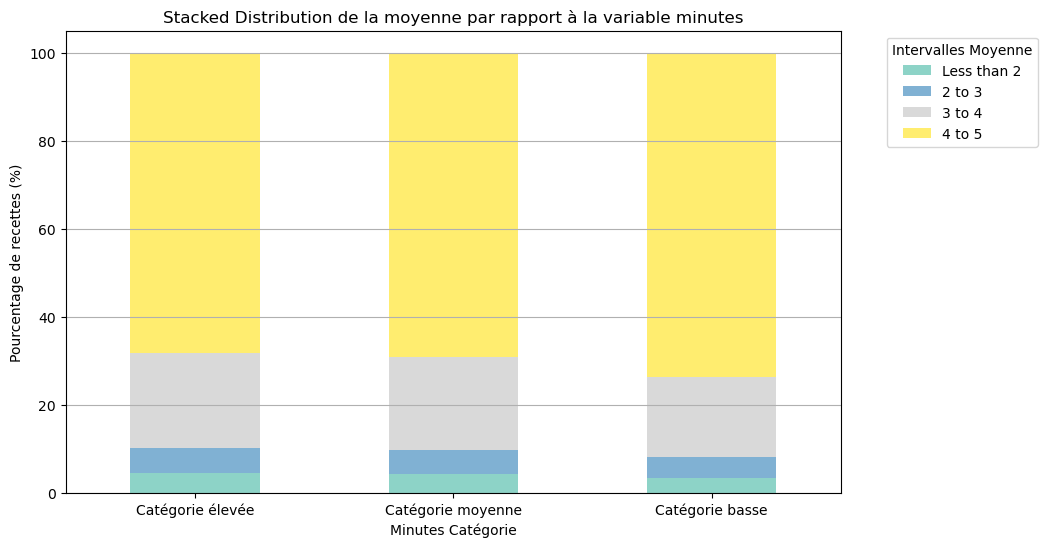


Comparison of Rating Distribution in %:
                 Catégorie élevée  Catégorie moyenne  Catégorie basse
rating_category                                                      
Less than 2              4.451891           4.222448         3.292064
2 to 3                   5.696506           5.599668         4.792650
3 to 4                  21.685017          21.007602        18.106354
4 to 5                  68.166587          69.170283        73.808933


In [31]:
comparison_minutes = rating_distribution(
    df=cleaned_df,
    variable='minutes',
    rating_var='note_moyenne',
    low_threshold=15,
    mean_range=(30, 50),
    high_threshold=180
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_minutes)

Ces éléments nous montrent que la durée de préparation a un impact sur la note. Des temps de préparation plus courts sont associés à des meilleures moyennes, alors que les temps de préparation plus longs obitennent de moins bonnes notes (10% less than 3 VS 8% pour les recettes courtes).
Mais cela peut aussi juste vouloir dire que les utilisateurs qui notent préfèrent les recettes rapides à préparer, impactant ainsi leur satisfaction et leur notes.

Faisons la même analyse avec la complexité : n_steps et n_ingredients.

Ces variables ont la particularité qu'à la fois des nombre d'étapes/ingrédients élevés et réduits peuvent tirer la moyenne vers le bas. Nous allons comparer pour les deux variables: moins de 3 VS plus de 15 VS entre 6 et 12 (1e et 3e quartile)

On garde les mêmes bins pour les ratings.

C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value 

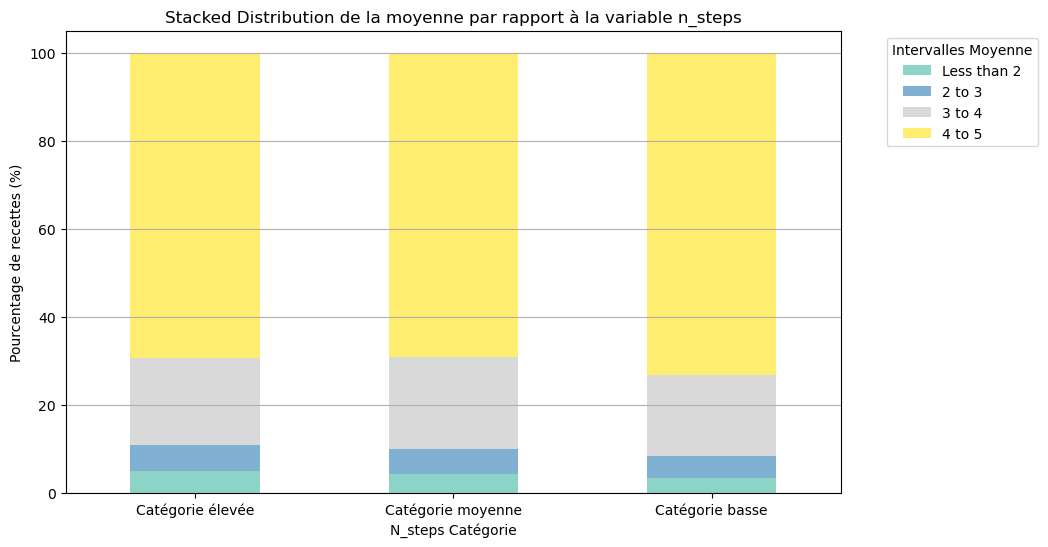


Comparison of Rating Distribution in %:
                 Catégorie élevée  Catégorie moyenne  Catégorie basse
rating_category                                                      
Less than 2              5.016666           4.149695         3.298370
2 to 3                   5.868951           5.698405         4.928599
3 to 4                  19.619425          20.882128        18.463288
4 to 5                  69.494958          69.269773        73.309743


In [32]:
comparison_steps = rating_distribution(
    df=cleaned_df,
    variable='n_steps',
    rating_var='note_moyenne',
    low_threshold=3,
    mean_range=(8, 10),
    high_threshold=15
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_steps)

C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value 

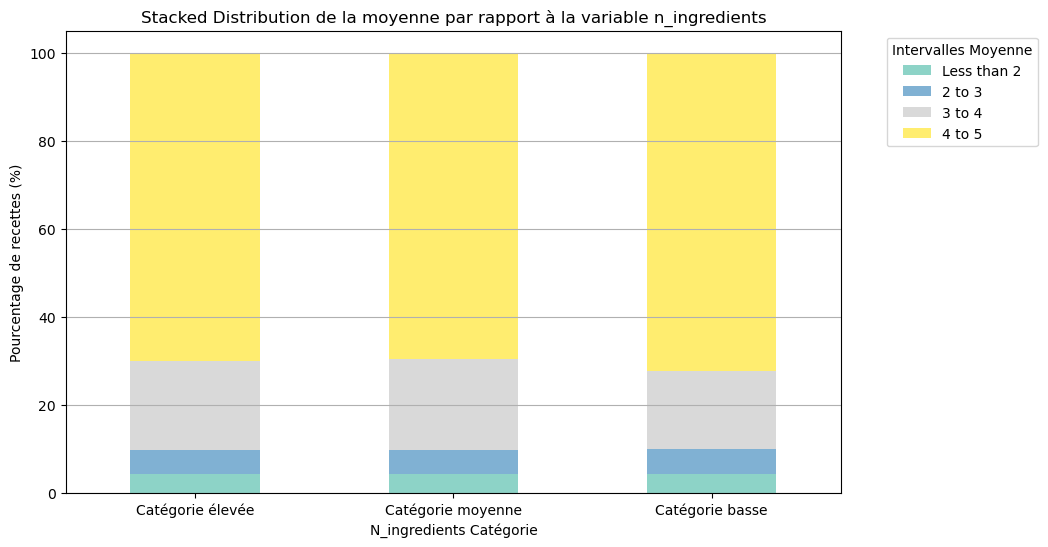


Comparison of Rating Distribution in %:
                 Catégorie élevée  Catégorie moyenne  Catégorie basse
rating_category                                                      
Less than 2              4.293833           4.112429         4.193739
2 to 3                   5.409387           5.537878         5.670408
3 to 4                  20.174700          20.661781        17.720024
4 to 5                  70.122080          69.687912        72.415830


In [33]:
comparison_ingr = rating_distribution(
    df=cleaned_df,
    variable='n_ingredients',
    rating_var='note_moyenne',
    low_threshold=3,
    mean_range=(8, 10),
    high_threshold=15
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_ingr)

Même analyse pour la variable nombre d'étapes : plus les recettes ont un nombre d'étapes élevé / sont complexes plus elles sont mal notées. A contrario les recettes avec moins de 3 étapes sont sensiblement mieux notées.

Le nombre d'ingrédients en revanche ne semble pas impacté la moyenne.


Réalisons une régression avec ces trois variables pour comprendre dans quelle mesure elles impactent la note et si cette hypothèse est statistiquement viable.

In [34]:
# Vérifions la multi-collinéarité entre ces variables 

columns_to_analyze = ['minutes','n_steps','n_ingredients']
# Calculer la matrice de corrélation
correlation_matrix = merged_df[columns_to_analyze].corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

                minutes   n_steps  n_ingredients
minutes        1.000000  0.018197      -0.012104
n_steps        0.018197  1.000000       0.428213
n_ingredients -0.012104  0.428213       1.000000


On va réaliser l'OLS sans la variable ingrédients.

In [35]:
# Regression analysis pour les 3 variables : minutes, n_steps et note_moyenne

# Prepare data
X = cleaned_df[['minutes', 'n_steps']]
X = sm.add_constant(X)
y = cleaned_df['note_moyenne']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           note_moyenne   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     112.4
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           1.57e-49
Time:                        15:04:26   Log-Likelihood:            -2.7041e+05
No. Observations:              195230   AIC:                         5.408e+05
Df Residuals:                  195227   BIC:                         5.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4186      0.005    925.591      0.0

ANALYSE :

R-Squared = O.OO1 -> seulement 0.1% de la variance dans les résultats est expliquée par les variables n_steps et minutes. C'est très bas, ces variables ne semblent pas avoir de pouvoir prédictif sur les ratings, même si on a pu détecter des tendances de comportements users.

Prob (F-Stat) = p-value est statistiquement signifiante (car < 0.05) -> au moins un estimateur a une relation linéaire avec note_moyenne. Cependant l'effet sera minime, comme le montre le résultat R-Squared

Coef minute : VERY small. p-value < 0.05 donc statistiquement signifiant mais son effet est quasi négligeable sur note_moyenne. Même constat pour n_steps même si l'effet est légèrement supérieur : une augmentation de 10 étapes va baisser la moyenne d'environ 0.025...

Les tests Omnibus / Prob(Omnibus) et Jarque-Bera (JB) / Prob(JB) nous permettent de voir que les résidus ne suivent probablement pas une distribution gaussienne, les conditions pour une OLS ne sont donc pas remplies.

--> il va falloir utiliser une log transformation pour s'approcher de variables gaussiennes.

In [36]:
cleaned_df['minutes_log'] = np.log1p(cleaned_df['minutes'])
cleaned_df['n_steps_log'] = np.log1p(cleaned_df['n_steps'])

In [37]:
# Regression analysis for 3 variables 

# Prepare data
X = cleaned_df[['minutes_log', 'n_steps_log']]
X = sm.add_constant(X)
y = cleaned_df['note_moyenne']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           note_moyenne   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     176.3
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           3.17e-77
Time:                        15:04:26   Log-Likelihood:            -2.7035e+05
No. Observations:              195230   AIC:                         5.407e+05
Df Residuals:                  195227   BIC:                         5.407e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.5488      0.011    411.596      

En passant au log, on se rend compte que la variable minute a plus de poids sur la moyenne que le nombre d'étapes. Néanmoins bien que les variables minutes_log et n_steps_log soient statistiquement significatives (cf p value), leur contribution à la prédiction de la note moyenne est très faible.
En effet R2 est toujours extrêmement petit donc ces deux variables ont un impact minime sur la moyenne, qui ne permet pas d'expliquer les variations de la moyenne.

Il est probablement nécessaire d'explorer d'autres variables explicatives ou d'utiliser un modèle non linéaire pour mieux comprendre la note_moyenne.

# Analyser le contenu nutritionnel des recettes et leur impact sur les notes

Investiguons si les aspects nutritionnels des recettes (par ex le sucre ou le sel) impacte les moyennes de façon négative. En effet un utilisateur pourrait mal noter une recette s'il la considère peu healthy ou équilibrée.

In [38]:
# On va utiliser notre fonction rating_distribution. Pour connaitre les seuils, regardons le describe :

In [39]:
cleaned_df.describe()

,minutes,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,...,note_q1,note_q2,note_q3,note_q4,note_max,note_min,nb_note_lt_5,nb_note_eq_5,minutes_log,n_steps_log
count,195230.000000,195230.000000,195230.000000,195230.000000,195230.000000,195230.000000,195230.000000,195230.000000,195230.000000,195230.000000,...,195230.000000,195230.000000,195230.000000,195230.000000,195230.000000,195230.000000,195230.000000,195230.000000,195230.000000,195230.000000
mean,43.753660,9.425273,8.963003,326.287268,24.554198,42.401542,19.455017,27.874292,30.781576,9.869185,...,4.257743,4.492826,4.595382,4.669651,4.669651,3.648194,1.348230,3.505573,3.500285,2.220173
std,35.136802,5.186711,3.602162,218.952961,22.802569,51.924763,20.595347,29.253476,32.734396,8.297353,...,1.146485,0.987926,0.907993,0.885886,0.885886,1.740275,4.395614,13.229970,0.830135,0.512640
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147
25%,20.000000,6.000000,6.000000,160.300000,8.000000,8.000000,4.000000,6.000000,6.000000,3.000000,...,4.000000,4.000000,4.500000,5.000000,5.000000,3.000000,0.000000,1.000000,3.044522,1.945910
50%,35.000000,8.000000,9.000000,282.000000,18.000000,22.000000,13.000000,16.000000,20.000000,8.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1.000000,3.583519,2.197225
75%,60.000000,12.000000,11.000000,445.300000,35.000000,55.000000,28.000000,44.000000,45.000000,14.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,3.000000,4.110874,2.564949
max,202.000000,31.000000,25.000000,1529.400000,136.000000,280.000000,117.000000,164.000000,185.000000,52.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,380.000000,1252.000000,5.313206,3.465736


C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value 

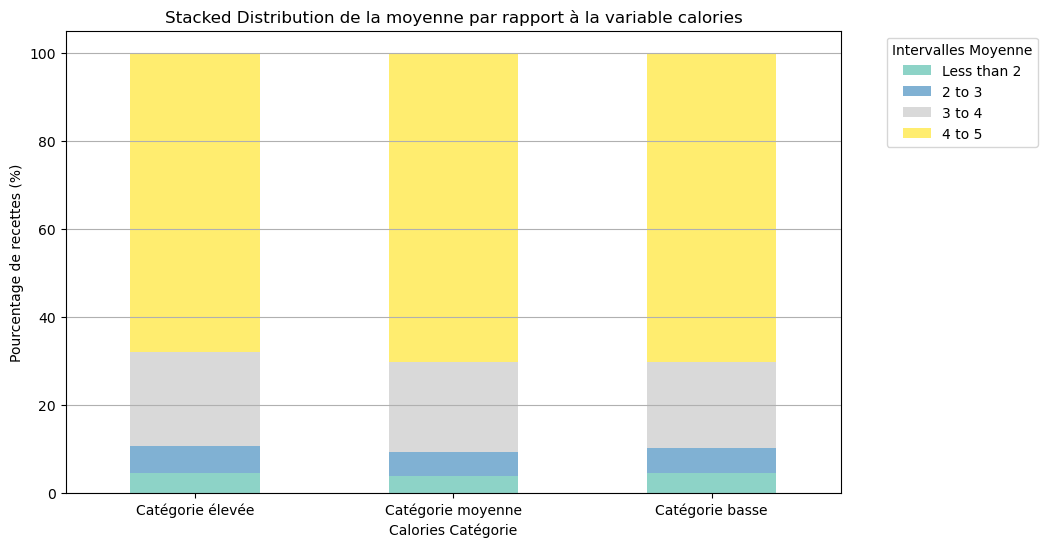


Comparison of Rating Distribution in %:
                 Catégorie élevée  Catégorie moyenne  Catégorie basse
rating_category                                                      
Less than 2              4.591564           3.871776         4.433962
2 to 3                   5.979712           5.329386         5.721903
3 to 4                  21.462894          20.602972        19.663659
4 to 5                  67.965830          70.195866        70.180476


In [40]:
# calories
comparison_calories = rating_distribution(
    df=cleaned_df,
    variable='calories',
    rating_var='note_moyenne',
    low_threshold=100,
    mean_range=(250, 350),
    high_threshold=1000
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_calories)

C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value 

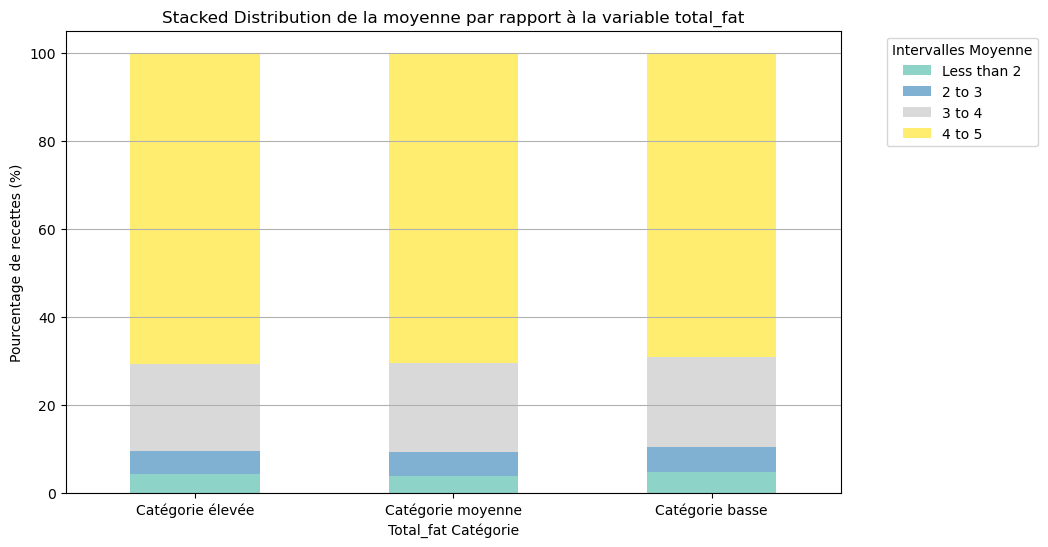


Comparison of Rating Distribution in %:
                 Catégorie élevée  Catégorie moyenne  Catégorie basse
rating_category                                                      
Less than 2              4.162855           3.821436         4.591093
2 to 3                   5.215005           5.313570         5.734700
3 to 4                  19.899360          20.274296        20.437029
4 to 5                  70.722781          70.590698        69.237179


In [41]:
comparison_fat = rating_distribution(
    df=cleaned_df,
    variable='total_fat',
    rating_var='note_moyenne',
    low_threshold=8,
    mean_range=(15, 25),
    high_threshold=100
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_fat)

C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value 

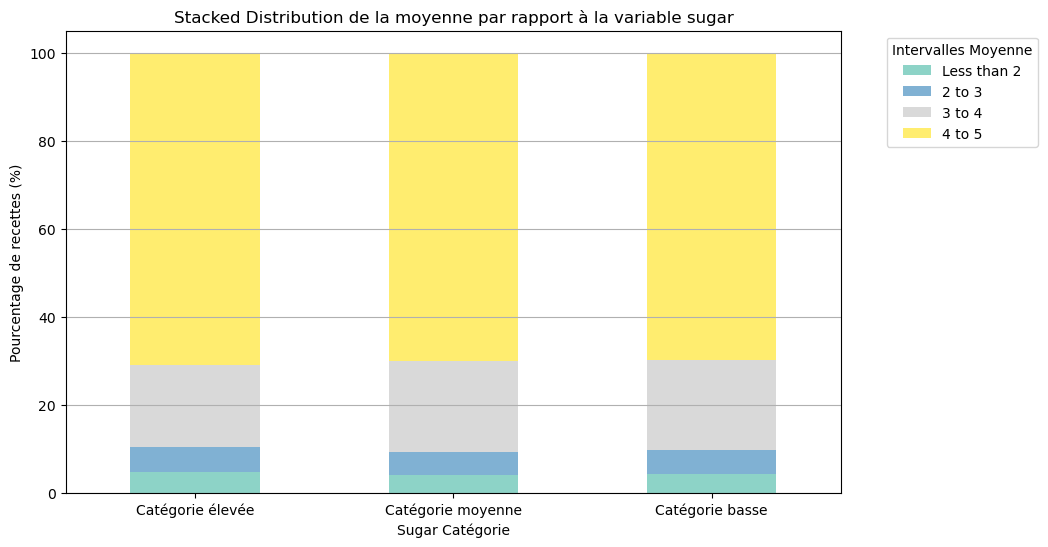


Comparison of Rating Distribution in %:
                 Catégorie élevée  Catégorie moyenne  Catégorie basse
rating_category                                                      
Less than 2              4.691170           3.919119         4.174616
2 to 3                   5.719079           5.226794         5.451077
3 to 4                  18.718926          20.840815        20.582357
4 to 5                  70.870825          70.013272        69.791951


In [42]:
comparison_sugar = rating_distribution(
    df=cleaned_df,
    variable='sugar',
    rating_var='note_moyenne',
    low_threshold=8,
    mean_range=(20, 30),
    high_threshold=80
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_sugar)

C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value 

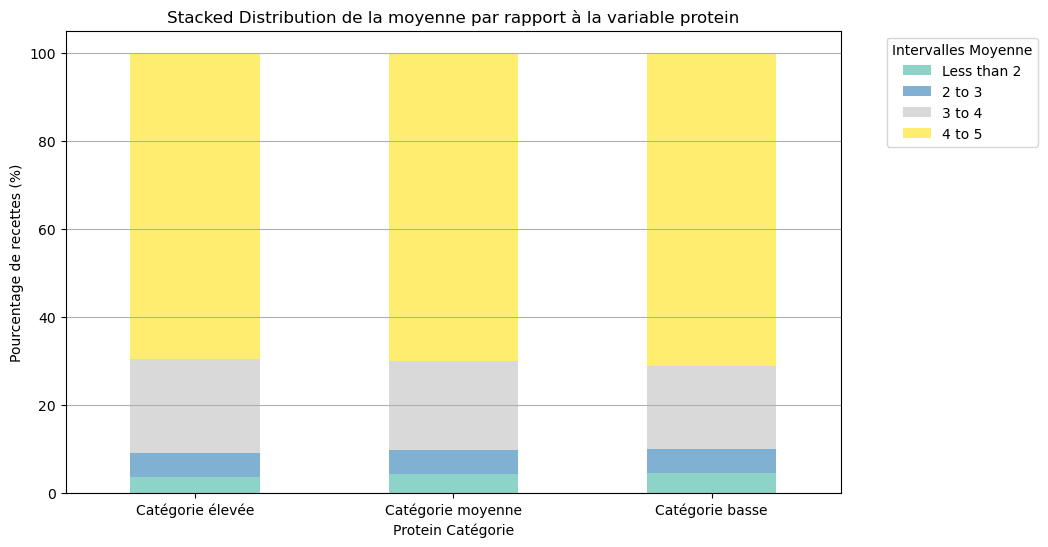


Comparison of Rating Distribution in %:
                 Catégorie élevée  Catégorie moyenne  Catégorie basse
rating_category                                                      
Less than 2              3.617140           4.148269         4.371354
2 to 3                   5.408319           5.484027         5.460387
3 to 4                  21.473289          20.366591        19.069925
4 to 5                  69.501252          70.001113        71.098334


In [43]:
comparison_prot = rating_distribution(
    df=cleaned_df,
    variable='protein',
    rating_var='note_moyenne',
    low_threshold=8,
    mean_range=(15, 25),
    high_threshold=60
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_prot)




Les variations sont trop faibles. Les contenus nutritionnels des recettes n'impactent pas la moyenne.

# Analyser l'impact de la popularité and visibilité des recettes sur les notes

In [44]:
# Calculer Q1, Q3, et IQR pour le nb_users
Q1_nb_user = cleaned_df['nb_user'].quantile(0.25)
Q2_nb_user = cleaned_df['nb_user'].quantile(0.50)
Q3_nb_user = cleaned_df['nb_user'].quantile(0.75)

print(Q1_nb_user)
print(Q2_nb_user)
print(Q3_nb_user)

1.0
2.0
4.0


C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\2178646288.py:20: SettingWithCopyWarning: 
A value 

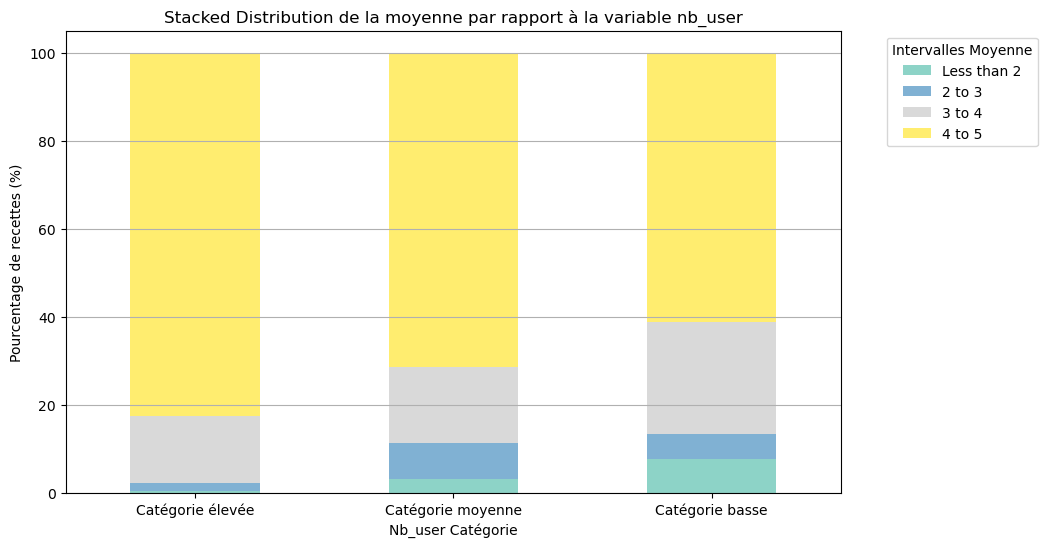


Comparison of Rating Distribution in %:
                 Catégorie élevée  Catégorie moyenne  Catégorie basse
rating_category                                                      
Less than 2              0.356029           3.145174         7.565088
2 to 3                   1.912828           8.048341         5.760062
3 to 4                  15.247341          17.283285        25.368564
4 to 5                  82.483802          71.523201        61.306286


In [45]:
comparison_popularity = rating_distribution(
    df=cleaned_df,
    variable='nb_user',
    rating_var='note_moyenne',
    low_threshold=2,
    mean_range=(2, 3),
    high_threshold=4
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_popularity)

Il est très net ici que les recettes ayant le moins de notes sont celles les moins bien notés. Cela veut dire qu'elles sont moins populaires et/ou moins visibles. Au contraire celles avec le plus de notes sont les mieux notées. 

A CREUSER (par Camille dans un autre notebook) :
- qui sont les users qui ont mal noté ces recettes : ont-ils beaucoup noté ? Mettent-ils que des mauvaises notes ? Pour vérifier si cette information est significative.
Ou ça peut vouloir dire que les utilisateurs ne notent pas les mauvaises recettes. La mauvaise note appelle la mauvaise note. 
- faire un heatmap : nb_users/note_moyenne

# Analyses des variables categorical - tags & descriptions - pour comprendre grâce au verbage les critères d'une mauvaise note

Analysons les tags et descriptions pour essayer de trouver des thèmes communs entre les recettes mal notées. On les comparera aux recettes bien notées. Pour cela nous utiliserons les dataframes bad_ratings et good_ratings. La première étape est de réaliser un pre-processing de ces variables (enlever les mots inutiles, tokeniser).

In [46]:
def preprocess_text(text):
    # Convertir en minuscule
    text = text.lower()
    # Retirer la punctuation et les caractères speciaux
    text = re.sub(r'[^\w\s]', '', text)
    # Retirer les chiffres
    text = re.sub(r'\d+', '', text)
    # Enlever les "stop words" (d'après liste fournie par sklearn)
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

In [47]:
# Appliquer la fonction aux variables tags et description 
bad_ratings['tags_clean'] = bad_ratings['tags'].fillna('').apply(preprocess_text)
bad_ratings['description_clean'] = bad_ratings['description'].fillna('').apply(preprocess_text)

good_ratings['tags_clean'] = good_ratings['tags'].fillna('').apply(preprocess_text)
good_ratings['description_clean'] = good_ratings['description'].fillna('').apply(preprocess_text)

C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\4180344315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_ratings['tags_clean'] = bad_ratings['tags'].fillna('').apply(preprocess_text)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\4180344315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_ratings['description_clean'] = bad_ratings['description'].fillna('').apply(preprocess_text)
C:\Users\romd3\AppData\Local\Temp\ipykernel_3292\4180344315.py:5: SettingWithCopyWarning: 
A value is trying t

Maintenant que les colonnes sont pre-procéssées, tentons de dégager des tendances en regardant les distributions :

In [48]:
# Combiner les tags and descriptions pour les recettes mal notées
all_tags_text = ' '.join(bad_ratings['tags_clean'].dropna())
all_description_text = ' '.join(bad_ratings['description_clean'].dropna())

# Sortir les mots les plus courants dans les tags et descriptions des recettes mal notées
bad_tag_words = all_tags_text.split()
bad_desc_words = all_description_text.split()

bad_tag_word_counts = Counter(bad_tag_words).most_common(100)
bad_desc_word_counts = Counter(bad_desc_words).most_common(100)

print("Les tags les plus courants dans les recettes mal notées :")
print(bad_tag_word_counts)

print("\nLes mots les plus courants dans les descriptions des recettes mal notées ::")
print(bad_desc_word_counts)

Les tags les plus courants dans les recettes mal notées :
[('preparation', 58190), ('timetomake', 58139), ('course', 54822), ('minutesorless', 45513), ('mainingredient', 42686), ('dietary', 41817), ('easy', 31629), ('occasion', 27873), ('cuisine', 22507), ('lowinsomething', 21379), ('maindish', 19008), ('healthy', 17962), ('equipment', 16567), ('numberofservings', 14234), ('vegetables', 13818), ('meat', 13560), ('tastemood', 12955), ('hoursorless', 12687), ('northamerican', 11861), ('desserts', 11239), ('lowsodium', 11000), ('stepsorless', 10803), ('lowcarb', 10307), ('vegetarian', 9530), ('lowcholesterol', 9488), ('lowcalorie', 9477), ('beginnercook', 9100), ('inexpensive', 9069), ('dinnerparty', 8709), ('ingredientsorless', 8441), ('lowsaturatedfat', 8188), ('oven', 8141), ('pastariceandgrains', 8086), ('holidayevent', 7916), ('american', 7655), ('eggsdairy', 7454), ('lowprotein', 7381), ('fruit', 7006), ('sidedishes', 6971), ('kidfriendly', 6848), ('comfortfood', 6806), ('poultry', 

In [49]:
# Combiner les tags and descriptions pour les recettes mal notées
all_tags_text = ' '.join(good_ratings['tags_clean'].dropna())
all_description_text = ' '.join(good_ratings['description_clean'].dropna())

# Sortir les mots les plus courants dans les tags et descriptions des recettes bien notées
good_tag_words = all_tags_text.split()
good_desc_words = all_description_text.split()

good_tag_word_counts = Counter(good_tag_words).most_common(100)
good_desc_word_counts = Counter(good_desc_words).most_common(100)

print("Les tags les plus courants dans les recettes bien notées :")
print(good_tag_word_counts)

print("\nLes mots les plus courants dans les descriptions des recettes bien notées ::")
print(good_desc_word_counts)

Les tags les plus courants dans les recettes bien notées :
[('preparation', 136847), ('timetomake', 136758), ('course', 129105), ('minutesorless', 109049), ('mainingredient', 102364), ('dietary', 97442), ('easy', 76461), ('occasion', 67875), ('cuisine', 54306), ('lowinsomething', 50488), ('maindish', 40807), ('healthy', 39230), ('equipment', 38948), ('vegetables', 34836), ('numberofservings', 34050), ('meat', 31257), ('tastemood', 30742), ('northamerican', 28609), ('hoursorless', 27786), ('stepsorless', 27784), ('lowsodium', 25814), ('lowcarb', 25699), ('desserts', 23221), ('dinnerparty', 23176), ('lowcalorie', 22974), ('vegetarian', 22249), ('lowcholesterol', 21942), ('beginnercook', 21908), ('ingredientsorless', 21433), ('holidayevent', 20025), ('lowprotein', 19799), ('inexpensive', 19341), ('eggsdairy', 18908), ('fruit', 18583), ('lowsaturatedfat', 18390), ('oven', 18365), ('sidedishes', 18235), ('american', 18196), ('pastariceandgrains', 16350), ('kidfriendly', 16307), ('presentati

On va maintenant sortir les mots uniquement présents dans les recettes mal notées :

In [51]:
# Transformer les mots les plus courants en ensembles pour les recettes mal notées
bad_tag_words_set = set(word for word, count in bad_tag_word_counts)
bad_desc_words_set = set(word for word, count in bad_desc_word_counts)

# Transformer les mots les plus courants en ensembles pour les recettes bien notées
good_tag_words_set = set(word for word, count in good_tag_word_counts)
good_desc_words_set = set(word for word, count in good_desc_word_counts)

# Obtenir les mots uniquement présents dans les recettes mal notées
unique_bad_tag_words = bad_tag_words_set - good_tag_words_set
unique_bad_desc_words = bad_desc_words_set - good_desc_words_set

# Afficher les résultats
print("Mots uniques dans les tags des recettes mal notées :", unique_bad_tag_words)
print("Mots uniques dans les descriptions des recettes mal notées :", unique_bad_desc_words)

Mots uniques dans les tags des recettes mal notées : {'grains', 'rice', 'casseroles', 'diabetic'}
Mots uniques dans les descriptions des recettes mal notées : {'know', 'work', 'missing', 'low', 'pie', 'cookies'}


La moyenne a pu modifier les corrélations entre variables. Nous allons inverser notre dataset pour vérifier cette hypothèse : partir du dataset user et y join les informations liées aux recettes. Nous aurons ainsi une ligne par rating dans notre dataset (et non une ligne par recette comme précédemment). De cette manière les variations et préférences individuelles seront analysables. 

# Changement de dataframe et clean

In [52]:
fichierrecipe_cleaned_part1 = "Pretraitement/recipe_cleaned_part_1.csv"
fichierrecipe_cleaned_part2 = "Pretraitement/recipe_cleaned_part_2.csv"
fichierrecipe_cleaned_part3 = "Pretraitement/recipe_cleaned_part_3.csv"        
fichierrecipe_cleaned_part4 = "Pretraitement/recipe_cleaned_part_4.csv"
fichierrecipe_cleaned_part5 = "Pretraitement/recipe_cleaned_part_5.csv"

def append_csv(*files):
    df_list = []
    for file in files:
        df = pd.read_csv(file)
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)
    
recipe = append_csv(fichierrecipe_cleaned_part1, fichierrecipe_cleaned_part2, fichierrecipe_cleaned_part3, fichierrecipe_cleaned_part4, fichierrecipe_cleaned_part5)
recipe.head()


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%),year,month,day,day_of_week
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,13.0,0.0,2.0,0.0,4.0,2005,9,16,Friday
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,18.0,0.0,17.0,22.0,35.0,1.0,2002,6,17,Monday
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,22.0,32.0,48.0,39.0,27.0,5.0,2005,2,25,Friday
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,17.0,10.0,2.0,14.0,8.0,20.0,2003,4,14,Monday
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,...,1.0,337.0,23.0,3.0,0.0,28.0,2002,10,25,Friday


In [ ]:
users = pd.read_csv("Data/RAW_interactions.csv")
users.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [ ]:
user_analysis = pd.merge(users, recipe, left_on="recipe_id", right_on="id", how="left")
user_analysis.head()

,user_id,recipe_id,date,rating,review,name,id,minutes,contributor_id,submitted,...,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%),year,month,day,day_of_week
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,40893.0,495.0,1533.0,2002-09-21,...,5.0,9.0,26.0,24.0,2.0,10.0,2002.0,9.0,21.0,Saturday
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,40893.0,495.0,1533.0,2002-09-21,...,5.0,9.0,26.0,24.0,2.0,10.0,2002.0,9.0,21.0,Saturday
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,44394.0,20.0,56824.0,2002-10-27,...,11.0,39.0,5.0,4.0,11.0,5.0,2002.0,10.0,27.0,Sunday
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,85009.0,10.0,64342.0,2004-02-25,...,342.0,134.0,290.0,161.0,301.0,42.0,2004.0,2.0,25.0,Wednesday
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,85009.0,10.0,64342.0,2004-02-25,...,342.0,134.0,290.0,161.0,301.0,42.0,2004.0,2.0,25.0,Wednesday


In [ ]:
print('Le nombre de missing values par colonnes :')
print(user_analysis.isna().sum())

Le nombre de missing values par colonnes :
user_id                0
recipe_id              0
date                   0
rating                 0
review               169
name                  34
id                    34
minutes               34
contributor_id        34
submitted             34
tags                  34
nutrition             34
n_steps               34
steps                 34
description           34
ingredients           34
n_ingredients         34
calories              34
total fat (%)         34
sugar (%)             34
sodium (%)            34
protein (%)           34
saturated fat (%)     34
carbohydrates (%)     34
year                  34
month                 34
day                   34
day_of_week           34
dtype: int64


34 notes ne correspondent à aucune recette. Ce sont les outliers qu'on a sorti du dataset recipe lors de la première analyse. Nous allons les drop. Nous allons ensuite remplasser les review manquantes par "missing".

In [ ]:
user_analysis = user_analysis.dropna(subset=['name'])

In [ ]:
user_analysis['review'] = user_analysis['review'].fillna("missing")


In [ ]:
print(user_analysis.isna().sum())

user_id              0
recipe_id            0
date                 0
rating               0
review               0
name                 0
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description          0
ingredients          0
n_ingredients        0
calories             0
total fat (%)        0
sugar (%)            0
sodium (%)           0
protein (%)          0
saturated fat (%)    0
carbohydrates (%)    0
year                 0
month                0
day                  0
day_of_week          0
dtype: int64


In [ ]:
# Vérifions si on a des doublons

num_duplicates = user_analysis.duplicated().sum()
print(f"Nombre de doublons : {num_duplicates}")

Nombre de doublons : 0


In [ ]:
# Nous ne gardons que les colonnes utiles à l'analyse et non répétitive
user_analysis.drop(['name', 'id','nutrition','steps', 'saturated fat (%)'], axis=1, inplace=True)

In [ ]:
# Listes de colonnes à convertir en object 
id_columns = ['recipe_id', 'user_id', 'contributor_id','year', 'month', 'day']  # Replace with your actual ID column names

# Convert each ID column to a categorical type
for col in id_columns:
    user_analysis[col] = user_analysis[col].astype('object')

# Verify the changes
print(user_analysis.dtypes)

user_id               object
recipe_id             object
date                  object
rating                 int64
review                object
minutes              float64
contributor_id        object
submitted             object
tags                  object
n_steps              float64
description           object
ingredients           object
n_ingredients        float64
calories             float64
total fat (%)        float64
sugar (%)            float64
sodium (%)           float64
protein (%)          float64
carbohydrates (%)    float64
year                  object
month                 object
day                   object
day_of_week           object
dtype: object


In [ ]:
# Renaming des colonnes :
user_analysis.columns = ['user_id', 'recipe_id', 'date', 'rating', 'review', 'minutes',
       'contributor_id', 'submitted', 'tags', 'n_steps', 'description',
       'ingredients', 'n_ingredients', 'calories', 'total_fat',
       'sugar', 'sodium', 'protein', 'carbohydrates', 'year',
       'month', 'day', 'day_of_week']

In [ ]:
user_analysis.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review', 'minutes',
       'contributor_id', 'submitted', 'tags', 'n_steps', 'description',
       'ingredients', 'n_ingredients', 'calories', 'total_fat', 'sugar',
       'sodium', 'protein', 'carbohydrates', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

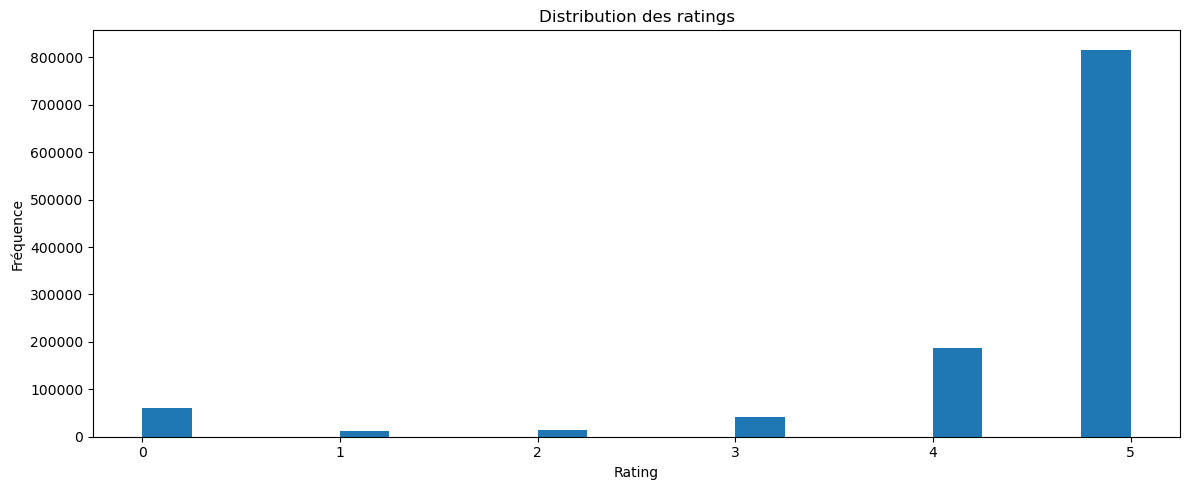

In [ ]:
# Vérifier la distribution des ratings
plt.figure(figsize=(12, 5))
plt.hist(user_analysis['rating'], bins=20)
plt.title('Distribution des ratings')
plt.xlabel('Rating')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

La distribution étant très asymétrique à gauche, nous allons créer une variable binaire 'bonne note/mauvaise note' pour contrebalancer ce déséquilibre dans l'analyse

In [ ]:
# Créer la variable binaire cible 'binary_rating' en fonction de la note
# Mauvaise note (<=4) sera codée par 0, et bonne note (>4) par 1
user_analysis['binary_rating'] = user_analysis['rating'].apply(lambda x: 0 if x <= 4 else 1)

In [ ]:
numerical_col = user_analysis.select_dtypes(include=['int64', 'float64']).columns
print(numerical_col)

Index(['rating', 'minutes', 'n_steps', 'n_ingredients', 'calories',
       'total_fat', 'sugar', 'sodium', 'protein', 'carbohydrates',
       'binary_rating'],
      dtype='object')


Dernière étape de nettoyage : supprimer les valeurs abbérantes 

In [ ]:
# Calculer les pourcentages d'outliers pour chaque colonne :
outlier_info = {}

for column in numerical_col:  
    Q1 = user_analysis[column].quantile(0.15)  
    Q3 = user_analysis[column].quantile(0.85)  
    IQR = Q3 - Q1  # Étendue interquartile
    
    # Nous nous concentrerons sur la borne supérieure qui comprend tous les outliers
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifier les outliers
    outliers = user_analysis[(user_analysis[column] > upper_bound)]
    
    # Calculer le pourcentage d'outliers
    outlier_percentage = (len(outliers) / len(user_analysis)) * 100
    
    # Ajouter les informations dans un dictionnaire
    outlier_info[column] = {
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers),
        'Outlier Percentage (%)': outlier_percentage
    }

# Convertir le dictionnaire en DataFrame pour une meilleure lisibilité
import pandas as pd
outlier_summary = pd.DataFrame(outlier_info).T

# Afficher les résultats
print(outlier_summary)

               Upper Bound  Outlier Count  Outlier Percentage (%)
rating                6.50            0.0                0.000000
minutes             217.50        77803.0                6.871035
n_steps              30.00         8793.0                0.776538
n_ingredients        25.00         1200.0                0.105976
calories           1504.45        38987.0                3.443068
total_fat           132.50        36779.0                3.248073
sugar               272.50        51904.0                4.583811
sodium              120.50        34668.0                3.061644
protein             169.00        15683.0                1.385017
carbohydrates        52.00        42978.0                3.795527
binary_rating         2.50            0.0                0.000000


In [ ]:
# Définir les colonnes sur lesquelles nous voulons appliquer la suppression des valeurs aberrantes
col_to_clean = ['minutes', 'n_steps', 'n_ingredients', 'calories', 'total_fat', 'sugar',
                'sodium', 'protein', 'carbohydrates']

# Créer une copie du DataFrame initial pour travailler dessus
cleaned_user_analysis = user_analysis.copy()

# Appliquer le filtrage des outliers
for col in col_to_clean:
    Q1 = user_analysis[col].quantile(0.15)
    Q3 = user_analysis[col].quantile(0.85)
    IQR = Q3 - Q1  # Étendue interquartile
    
    # Calculer la borne supérieure
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrer les lignes cumulativement
    cleaned_user_analysis = cleaned_user_analysis[cleaned_user_analysis[col] <= upper_bound]

# Vérifier la taille avant et après la suppression des outliers
print(f"Taille initiale du DataFrame : {user_analysis.shape}")
print(f"Taille après suppression des outliers : {cleaned_user_analysis.shape}")

Taille initiale du DataFrame : (1132333, 24)
Taille après suppression des outliers : (953938, 24)


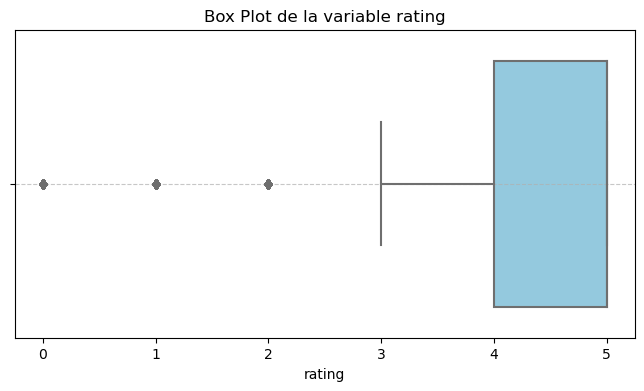

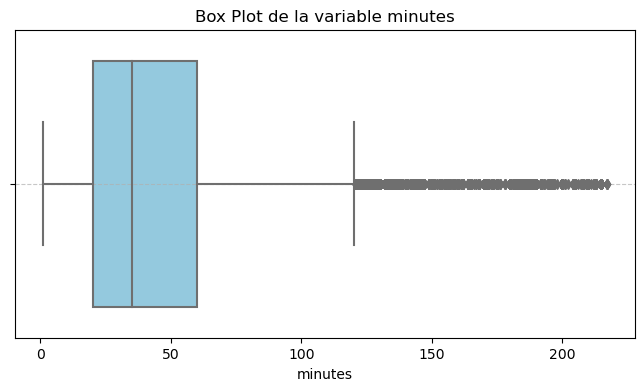

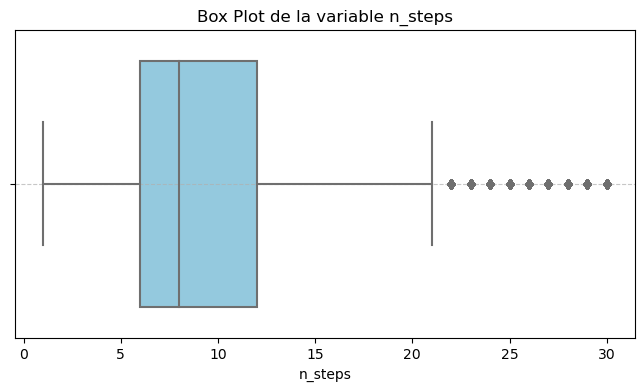

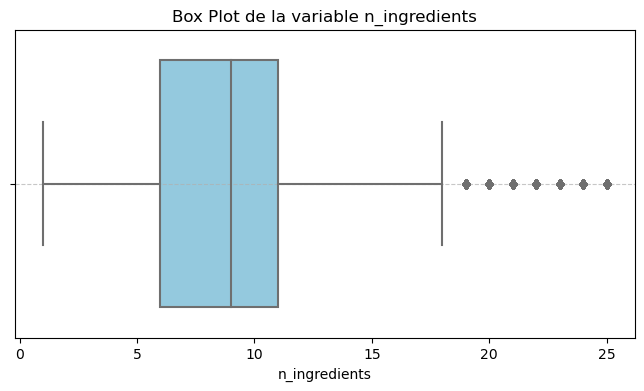

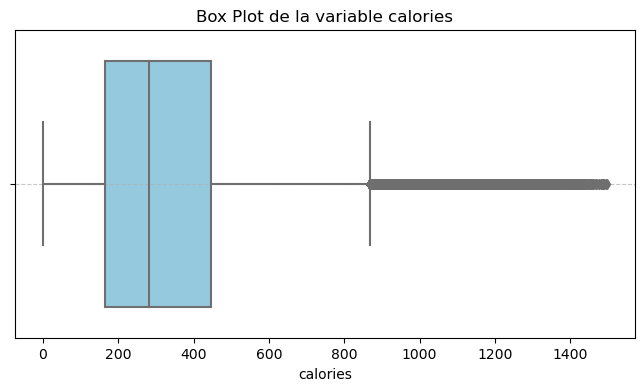

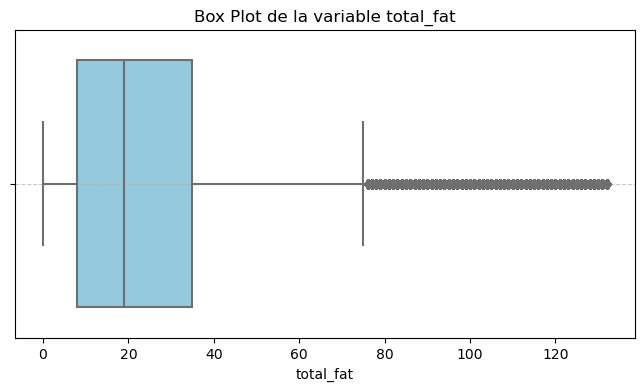

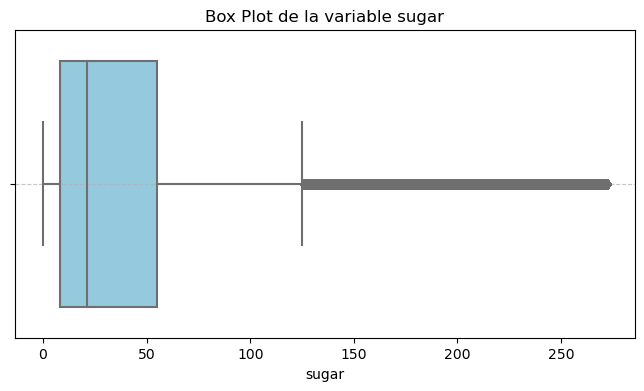

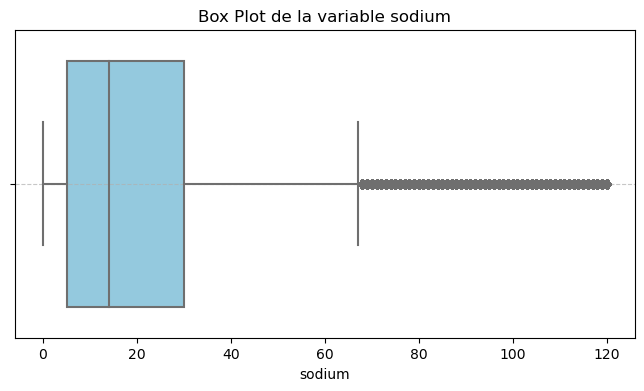

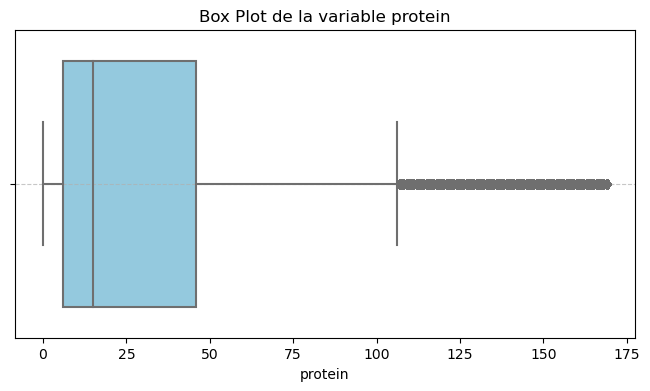

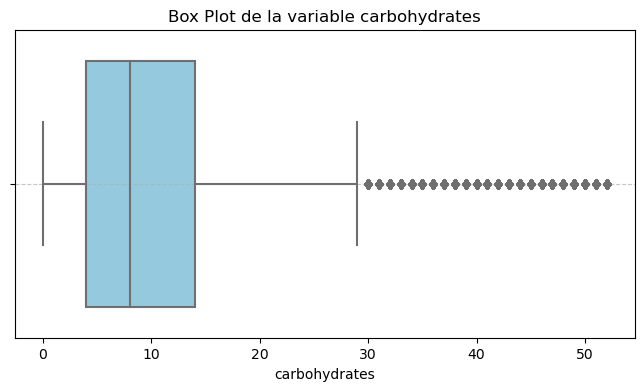

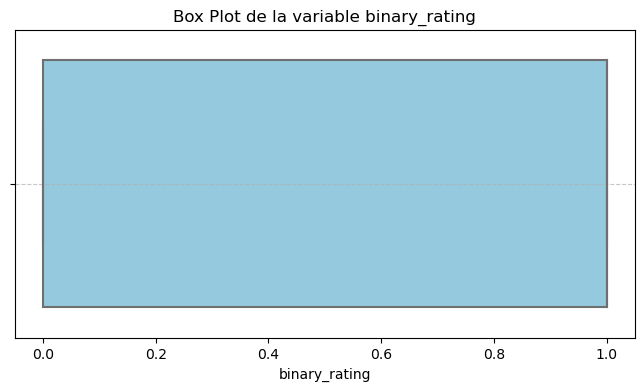

In [ ]:
# Regardons à nouveau les boxplots :

numerical_col_clean= cleaned_user_analysis.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_col_clean:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cleaned_user_analysis[column], color='skyblue')
    plt.title(f'Box Plot de la variable {column}')
    plt.xlabel(column)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

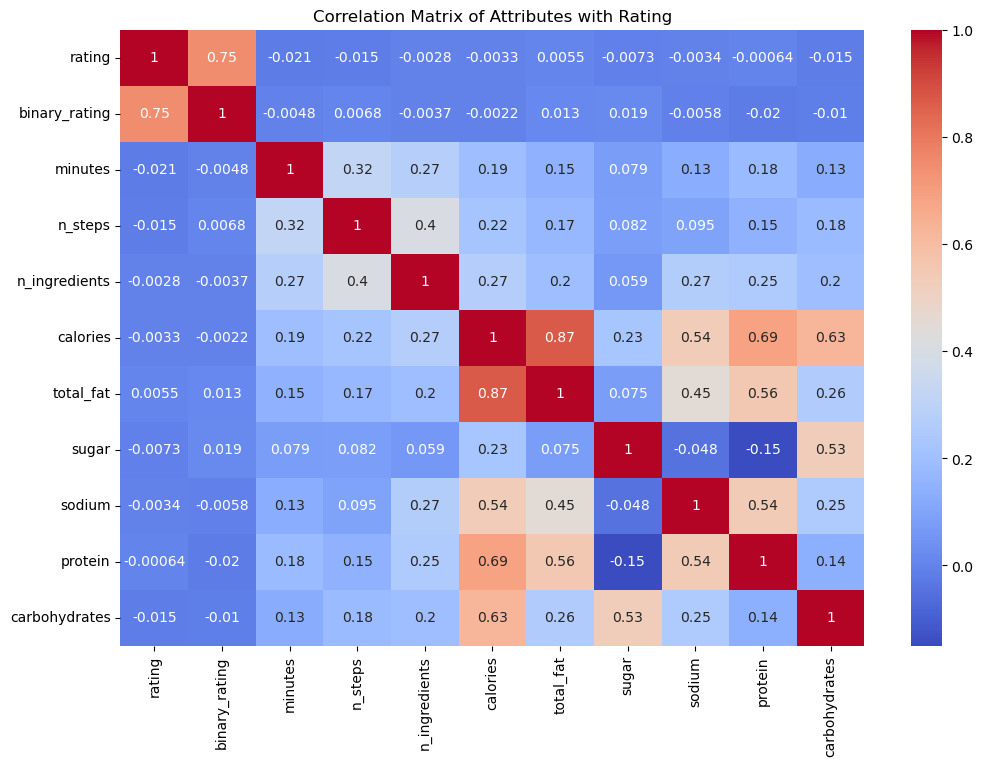

In [ ]:
# Vérifions les corrélations entre les variables de ce nouveau dataframe

plt.figure(figsize=(12, 8))
correlation = cleaned_user_analysis[['rating', 'binary_rating', 'minutes', 'n_steps', 'n_ingredients', 'calories',
       'total_fat', 'sugar', 'sodium', 'protein', 'carbohydrates']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Attributes with Rating')
plt.show()

Pas de corrélations visibles avec les notes. Nous allons créer de nouvelles variables et calculer leur corrélation.

# Feature Engineering sur le dataset user_analysis 

In [ ]:
# Catégoriser la complexité avec un score : 
cleaned_user_analysis['complexity_score'] = cleaned_user_analysis['n_steps'] * cleaned_user_analysis['n_ingredients']

In [ ]:
# La durée d'une étape (plus la durée est élevée, plus la recette peut avoir été mal renseignée)
# Par exemple une recette de 1h30 avec 3 étapes ne sera forcément pas assez détaillée

cleaned_user_analysis['minute_step'] = cleaned_user_analysis['minutes'] / cleaned_user_analysis['n_steps']

In [ ]:
# Longueur des descriptions : une description trop succinte peut baisser la note

cleaned_user_analysis['description_length'] = cleaned_user_analysis['description'].apply(lambda x: len(x) if pd.notnull(x) else 0)

In [ ]:
# Nombre de tags 

cleaned_user_analysis['n_tags'] = cleaned_user_analysis['tags'].apply(lambda x: len(x.split()))

In [ ]:
cleaned_user_analysis.head()

,user_id,recipe_id,date,rating,review,minutes,contributor_id,submitted,tags,n_steps,...,carbohydrates,year,month,day,day_of_week,binary_rating,complexity_score,minute_step,description_length,n_tags
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,20.0,56824.0,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...",5.0,...,5.0,2002.0,10.0,27.0,Sunday,0,20.0,4.0,7,43
8,76535,134728,2005-09-02,4,Very good!,40.0,166019.0,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",10.0,...,10.0,2005.0,8.0,24.0,Wednesday,0,120.0,4.0,78,14
9,273745,134728,2005-12-22,5,Better than the real!!,40.0,166019.0,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",10.0,...,10.0,2005.0,8.0,24.0,Wednesday,1,120.0,4.0,78,14
10,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,40.0,166019.0,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",10.0,...,10.0,2005.0,8.0,24.0,Wednesday,1,120.0,4.0,78,14
11,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...,40.0,166019.0,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",10.0,...,10.0,2005.0,8.0,24.0,Wednesday,1,120.0,4.0,78,14


In [ ]:
cleaned_user_analysis.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review', 'minutes',
       'contributor_id', 'submitted', 'tags', 'n_steps', 'description',
       'ingredients', 'n_ingredients', 'calories', 'total_fat', 'sugar',
       'sodium', 'protein', 'carbohydrates', 'year', 'month', 'day',
       'day_of_week', 'binary_rating', 'complexity_score', 'minute_step',
       'description_length', 'n_tags'],
      dtype='object')

In [ ]:
# Regardons la corrélation de ces nouvelles variables

plt.figure(figsize=(12, 8))
correlation2 = cleaned_user_analysis[['rating', 'binary_rating', 'complexity_score', 'step_minute','description_length', 'n_tags']].corr()
sns.heatmap(correlation2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Attributes with Rating')
plt.show()

KeyError: "['step_minute'] not in index"

<Figure size 1200x800 with 0 Axes>

# Analyse des features sur la notation

In [ ]:
cleaned_user_analysis.describe()

In [ ]:
cleaned_user_analysis['complexity_level'] = pd.cut(cleaned_user_analysis['complexity_score'], bins=[0, 20, 80, 200, float('inf')], labels=['simple', 'moderate', 'complex', 'very complex'])

In [ ]:
# Vérifions avec un stacked bar chart la proportion de ratings dans chaque catégorie ainsi créée

# Créer une crosstab avec la comptabilisation des ratings par niveau de complexité
rating_counts = pd.crosstab(cleaned_user_analysis['complexity_level'], cleaned_user_analysis['rating'], normalize='index') * 100

# Plot a stacked bar chart
rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Pourcentage de ratings dans chaque niveau de complexité')
plt.xlabel('Niveau de complexité')
plt.ylabel('Pourcentage (%)')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
cleaned_user_analysis['preparation_time'] = pd.cut(cleaned_user_analysis['minutes'], bins=[0, 15, 40, 120, float('inf')], labels=['quick', 'medium', 'long', 'very long'])

In [ ]:
rating_counts_time = pd.crosstab(cleaned_user_analysis['preparation_time'], cleaned_user_analysis['rating'], normalize='index') * 100

rating_counts_time.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Pourcentage de ratings par niveau de temps de préparation')
plt.xlabel('Preparation Time')
plt.ylabel('Pourcentage (%)')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

On remarque que les recettes très longues et très complexes rassemblent plus de mauvaises notes (<2)

In [ ]:
cleaned_user_analysis.columns

In [ ]:
cleaned_user_analysis.describe()

In [ ]:
cleaned_user_analysis['minute_step_aberation'] = pd.cut(cleaned_user_analysis['minute_step'], bins=[0, 2, 40, 150, float('inf')], labels=['quick', 'medium', 'long', 'very long'])

In [ ]:
rating_counts_min_step = pd.crosstab(cleaned_user_analysis['minute_step_aberation'], cleaned_user_analysis['rating'], normalize='index') * 100

rating_counts_min_step.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Pourcentage de ratings par niveau de minute par étape')
plt.xlabel('Minute par étape')
plt.ylabel('Pourcentage (%)')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Cette variable est intéressante : elle montre que l'incohérence entre la durée totale et la longueur du processus des recettes amène des mauvaises notes. Probablement la variable qui à ce niveau de l'analyse impact le plus les mauvaises notes et est la plus gage d'un manque de qualité des contributions.

In [ ]:
# Calculer la fréquence des ingrédients dans les recettes
# Drop les doublons de recette

unique_recipes = cleaned_user_analysis.drop_duplicates(subset='recipe_id')

import ast

l_ingredient = list(unique_recipes.ingredients)
list_ingredient = []
for item in l_ingredient: 
    item = ast.literal_eval(item)
    for i in item: 
        list_ingredient.append(i)

element_counts = Counter(list_ingredient)

In [ ]:
# Définissons un sueil de rareté et stockons les ingrédients rares dans un set (plus rapide qu'une liste)
rare_ingredients = set([ingredient for ingredient, count in element_counts.items() if count == 1])

# Parse ingredients once and check for any rare ingredient
def has_rare_ingredient(ingredient_str):
    # Convert the string representation of the list to an actual list of ingredients
    ingredients = ast.literal_eval(ingredient_str)
    # Check if any ingredient in the recipe is in the set of rare ingredients
    return any(ingredient in rare_ingredients for ingredient in ingredients)

# Ajouter une colonne qui flag si la recette comporte des ingrédients rares
cleaned_user_analysis['has_unique_ingredient'] = cleaned_user_analysis['ingredients'].apply(has_rare_ingredient)

In [ ]:
# Visualisons si la variable "unique ingredient" impacte les ratings
unique_ingr_percentage = cleaned_user_analysis.groupby('has_unique_ingredient')['rating'].value_counts(normalize=True) * 100
unique_ingr_percentage = unique_ingr_percentage.rename('percentage').reset_index()

unique_ingr_percentage_pivot = unique_ingr_percentage.pivot(index='has_unique_ingredient', columns='rating', values='percentage')

# Plot the stacked bar chart
unique_ingr_percentage_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Pourcentage des ratings pour les recettes avec et sans ingredients uniques')
plt.xlabel('Has Unique Ingredient')
plt.ylabel('Pourcentage (%)')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
cleaned_user_analysis['description_quality'] = pd.cut(cleaned_user_analysis['description_length'], bins=[0, 80, 200, 400, float('inf')], labels=['short', 'medium', 'long', 'very long'])

In [ ]:
rating_description_length = pd.crosstab(cleaned_user_analysis['description_quality'], cleaned_user_analysis['rating'], normalize='index') * 100

# Plot a stacked bar chart
rating_description_length.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Pourcentage de ratings en fonction de la longueur de la description')
plt.xlabel('Longueur description')
plt.ylabel('Pourcentage (%)')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Légère corrélation entre la longueur de la description de la recette et la note : une description très étayée aura plus de chances d'avoir des notes extrêmes : soit très bonnes, soit très mauvaises. La longueur de la description réduit les notes moyennes.

In [ ]:
cleaned_user_analysis.columns

# Analyse des distributions et corrélations 

In [ ]:
# Vérifions la distribution des variables numériques pour voir quelles variables transformer
for column in cleaned_user_analysis.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    plt.hist(cleaned_user_analysis[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution de la variable {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.grid(axis='y')
    plt.show()

In [ ]:
# Transformation par le log des variables avec forte skewness :

cleaned_user_analysis['log_minutes'] = np.log1p(cleaned_user_analysis['minutes'])
cleaned_user_analysis['log_n_steps'] = np.log1p(cleaned_user_analysis['n_steps'])
cleaned_user_analysis['log_n_ingredients'] = np.log1p(cleaned_user_analysis['n_ingredients'])
cleaned_user_analysis['log_calories'] = np.log1p(cleaned_user_analysis['calories'])
cleaned_user_analysis['log_fat'] = np.log1p(cleaned_user_analysis['total_fat'])
cleaned_user_analysis['log_sugar'] = np.log1p(cleaned_user_analysis['sugar'])
cleaned_user_analysis['log_sodium'] = np.log1p(cleaned_user_analysis['sodium'])
cleaned_user_analysis['log_protein'] = np.log1p(cleaned_user_analysis['protein'])
cleaned_user_analysis['log_carbo'] = np.log1p(cleaned_user_analysis['carbohydrates'])
cleaned_user_analysis['log_complexity_score'] = np.log1p(cleaned_user_analysis['complexity_score'])
cleaned_user_analysis['log_minute_step'] = np.log1p(cleaned_user_analysis['minute_step'])
cleaned_user_analysis['log_desc_length'] = np.log1p(cleaned_user_analysis['description_length'])

In [ ]:
# Distribution des log
list_log = ['log_minutes', 'log_n_steps',
       'log_n_ingredients', 'log_calories', 'log_fat', 'log_sugar',
       'log_sodium', 'log_protein', 'log_carbo', 'log_complexity_score',
       'log_minute_step', 'log_desc_length']
for column in list_log:
    plt.figure(figsize=(8, 4))
    plt.hist(cleaned_user_analysis[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution de la variable {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.grid(axis='y')
    plt.show()

In [ ]:
cleaned_user_analysis.columns

In [ ]:
# Vérifions à nouveau les corrélations à partir des logarithmes

plt.figure(figsize=(12, 8))
correlation_log = cleaned_user_analysis[['rating','binary_rating', 'log_minutes', 'log_n_steps',
       'log_n_ingredients', 'log_calories', 'log_fat', 'log_sugar',
       'log_sodium', 'log_protein', 'log_carbo', 'log_complexity_score',
       'log_minute_step', 'log_desc_length']].corr()
sns.heatmap(correlation_log, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Log Attributes with Rating')
plt.show()

In [ ]:
# Regression analysis for log variables

# Prepare data
X = cleaned_user_analysis[['log_minutes', 'log_n_steps',
       'log_n_ingredients', 'log_calories', 'log_fat', 'log_sugar',
       'log_sodium', 'log_protein', 'log_carbo', 'log_complexity_score',
       'log_minute_step', 'log_desc_length']]
X = sm.add_constant(X)
y = np.log1p(cleaned_user_analysis['rating'])

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

Interprétation :

- log_n_ingredients et log_complexity_score : Ces deux variables ne semblent pas statistiquement significatives, car leur p-value est supérieure à 0.05. Cela signifie qu'elles n'ont probablement pas d'influence sur rating dans ce modèle. Le reste des variables est significative
-  Certaines variables, comme log_minutes, log_n_steps, log_fat, et log_sodium, semblent significativement associées à rating. Cependant, ces effets sont très faibles et peuvent ne pas être significatifs en pratique, surtout compte tenu du très faible R-squared.


Il n'existe pas de modèles linéaires pour expliquer rating d'un point de vue de la qualité des recettes postées par les contributeurs, ni au point de vue de la saisonnalité. Il pourrait être intéressant d’explorer des modèles de machine learning non linéaires pour capturer des patterns plus complexes, mais nous ne rentrerons pas là dedans pour ce projet.
Il se pourrait que les notes soient plus une question de biais des utilisateurs qui votent que de qualité des recettes. Ceci constituera la dernière partie de notre analyse.

# Analyse des profils utilisateurs et des biais

**Profils utilisateurs**: Quels types d'utilisateurs notent et comment notent-ils ? Les mauvaises note seraient-elles plutôt des questions de biais que de qualité des recettes ?
- moyenne des notes par utilisateur ? 
- Certains sont-ils des "serial bad-raters" vs les "generous raters" ? 
- Quels utilisateurs donnent systématiquement des notes basses ou élevées (par exemple, moyenne ≤ 2 ou ≥ 4) ?
- Quels utilisateurs ont la plus grande variance dans leurs notes, et que cela indique-t-il ?
- Y a-t-il une corrélation entre le nombre de recettes notées par utilisateur et la moyenne des notes qu’ils attribuent ? 
- quel % de users contribue en postant des recettes ?
- les utilisateurs les plus contributeurs sont-ils ceux qui obtiennent les meilleures notes ? Mettent les pires notes ? Les new comers obtiennent ils des moins bonnes notes ?
- Les notes des contributeurs sont-elles en moyenne plus élevées ou plus variées que celles des non-contributeurs ?
- Les contributeurs évaluent-ils davantage de recettes que les non-contributeurs ?
- Les utilisateurs qui notent beaucoup de recettes (par exemple, plus de 50) sont-ils aussi ceux qui donnent les notes les plus extrêmes (min ou max) ?

In [ ]:
cleaned_user_analysis.head()

Metrics à calculer par utilisateur : 
- nombre de recettes notées, 
- moyenne des notes mises, médiane, min, max, 
- variance des notes mises
- true/false si l'utilisateur est aussi contributeur (si user_id = contributor_id)

In [ ]:
# - 'user_id': l'identifiant de l'utilisateur
# - 'rating': la note donnée par l'utilisateur
# - 'contributor_id': l'identifiant du contributeur de la recette

# Regrouper par utilisateur pour calculer les métriques
user_profiles = cleaned_user_analysis.groupby('user_id').agg(
    num_recipes_rated=('rating', 'count'),       # Nombre de recettes notées
    mean_rating=('rating', 'mean'),             # Moyenne des notes
    median_rating=('rating', 'median'),         # Médiane des notes
    min_rating=('rating', 'min'),               # Note minimale
    max_rating=('rating', 'max'),               # Note maximale
    var_rating=('rating', 'var')                # Variance des notes
).reset_index()

# Ajouter une colonne booléenne indiquant si l'utilisateur est contributeur
user_profiles['is_contributor'] = user_profiles['user_id'].isin(cleaned_user_analysis['contributor_id'])

# Remplacer les NaN dans la colonne variance par 0 (au cas où un utilisateur n'a noté qu'une recette)
user_profiles['var_rating'] = user_profiles['var_rating'].fillna(0)

In [ ]:
user_profiles.head()

In [ ]:
print(user_profiles.isna().sum())

Les contributeurs évaluent-ils davantage de recettes que les non-contributeurs ?

In [ ]:
# distribution du nombre de raters également contributeurs
plt.figure(figsize=(8, 5))
sns.countplot(x=user_profiles['is_contributor'], palette='pastel')
plt.title('Distribution de la variable is_contributor', fontsize=16)
plt.xlabel('is_contributor', fontsize=14)
plt.ylabel('Nombre d’utilisateurs', fontsize=14)
plt.xticks([0, 1], labels=['Non-Contributeur', 'Contributeur'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Moyenne du nombre de recettes notées pour contributeurs et non-contributeurs
contributor_stats = user_profiles.groupby('is_contributor')['num_recipes_rated'].mean()

print("Nombre moyen de recettes notées :")
print(contributor_stats)

Les contributeurs notent plus de recettes que les non-contributeurs. 
Mais leurs notes ont-elles en moyenne plus élevées ou plus variées que celles des non-contributeurs ?

In [ ]:
# Moyenne et variance des notes pour contributeurs et non-contributeurs
rating_stats = user_profiles.groupby('is_contributor').agg(
    mean_rating=('mean_rating', 'mean'),
    var_rating=('var_rating', 'mean')
)

print("Statistiques des notes pour contributeurs et non-contributeurs :")
print(rating_stats)

In [ ]:
# Distribution des notes moyennes par groupe (contributeur vs non-contributeur)
plt.figure(figsize=(10, 6))
sns.boxplot(x=user_profiles['is_contributor'], y=user_profiles['mean_rating'], palette='pastel')
plt.title('Distribution des notes moyennes par type d’utilisateur', fontsize=16)
plt.xlabel('is_contributor', fontsize=14)
plt.ylabel('Moyenne des notes', fontsize=14)
plt.xticks([0, 1], labels=['Non-Contributeur', 'Contributeur'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Les utilisateurs ne contribuant pas sont ceux qui notent le plus mal et qui sont les plus réguliers et homogènes dans leur notation. 
Les contributeurs sont ceux qui notent le plus de recettes et ils les notent bien. Cependant ils sont beaucoup plus dispersés dans leur notation.
Ceci constitue un premier biais qui tire les notes et les moyennes vers le haut.

Les utilisateurs qui notent beaucoup de recettes sont-ils ceux qui donnent les notes les plus extrêmes ? Et les utilisateurs peu actifs ?

In [ ]:
# Définir un seuil pour les utilisateurs actifs (par exemple, > 50 recettes notées)
active_users = user_profiles[user_profiles['num_recipes_rated'] > 50]

# Statistiques sur les notes minimales et maximales pour ces utilisateurs
active_users.describe()

In [ ]:
# Définir un seuil pour les utilisateurs actifs (par exemple, > 50 recettes notées)
inactive_users = user_profiles[user_profiles['num_recipes_rated'] < 3]

# Statistiques sur les notes minimales et maximales pour ces utilisateurs
inactive_users.describe()

Ceci confirme que les serial raters ont tendance à mieux noter (médiane à 4.6) mais qu'ils sont moins cohérents dans leurs notes. Alors que les raters occasionnels notent plus durement et sont plus constants dans leur notation. Un serial rater est ambassadeur du site alors qu'un rater occasionnel va noter uniquement lorsqu'il n'est pas content = biais

Analysons la distribution de ces variables

In [ ]:
# Liste des colonnes numériques à analyser
numerical_columns = ['num_recipes_rated', 'mean_rating', 'median_rating', 'min_rating', 
                     'max_rating', 'var_rating']

# Boucle pour tracer un boxplot pour chaque variable
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=user_profiles[column], color='skyblue')
    plt.title(f'Boxplot de la variable : {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Conclusion et next steps

Nous avons retourné le dataframe dans tous les sens :
- créer de nouvelles features
- analyser les variables par rapport aux ratings et par rapport aux moyennes et médiannes des ratings
- analyser la temporalité
- transformer les variables grâce aux logs pour que nos variables deviennent gaussiennes
- analyser les profils des utilisateurs et contributeurs

Nous ne trouvons pas de corrélations fortes entre les éléments qualitatifs d'une recette et la note. D'après l'analyse de régression linéaire, le modèle n'est pas linéaire.
En revanche nous avons identifié des biais humains forts dans la relation aux notes. 

Les prochaines étapes de l'analyse :
1. Analyse textuelle sur les descriptions et les reviews
2. Analyse des tags pour comprendre s'ils ont un impact sur les notes